## Prediction of the Bank Customer's Repayment
#### Arthor: Wenxuan Zhang, Hongyu Lu
#### 2022/12/14

In [116]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from sklearn.inspection import permutation_importance

In [117]:
data = pd.read_csv('application_train.csv')
app_train = pd.DataFrame(data)
app_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
app_train = app_train.drop(labels=None,axis=0, index=[0,49,51,81,90,98,104,117,127,128,135,141,186,191,206,226,231,235,259,264,297,340,361,367,372,374,382,388,417,470,472,475,485,521,543,549,551,569,582,625,628,642,673,733,756,757,758,768,770,774,775,783,801,802,821,834,885,887,888,906,915,923,944,946,948,949,963,970,983,1025,1049,1077,1102,1110,1111,1112,1114,1123,1145,1146,1152,1194,1207,1275,1307,1352,1387,1403,1409,1425,1475,1481,1505,1571,1579,1586,1587,1590,1593,1599,1601,1614,1625,1651,1670,1682,1687,1720,1732,1745,1756,1770,1771,1774,1792,1806,1875,1894,1914,1938,1941,1966,1969,1971,2019,2040,2060,2069,2098,2167,2187,2213,2216,2223,2267,2274,2276,2282,2310,2333,2364,2368,2371,2373,2374,2443,2462,2480,2497,2506,2549,2553,2576,2623,2627,2629,2669,2675,2680,2686,2698,2703,2704,2717,2721,2726,2732,2748,2755,2779,2783,2791,2794,2795,2824,2839,2863,2866,2885,2897,2899,2905,2906,2909,2912,2916,2924,2942,2952,2989,3029,3083,3111,3126,3172,3176,3178,3183,3215,3234,3243,3251,3259,3276,3278,3292,3337,3412,3415,3425,3438,3512,3514,3516,3550,3565,3568,3581,3586,3667,3690,3816,3844,3883,3896,3907,3909,3931,3956,3972,3982,4017,4023,4039,4043,4075,4087,4092,4097,4151,4160,4161,4163,4186,4187,4211,4214,4222,4254,4255,4256,4267,4281,4301,4318,4330,4332,4333,4351,4354,4373,4379,4393,4408,4410,4423,4478,4485,4509,4522,4524,4529,4573,4620,4641,4643,4658,4695,4700,4703,4707,4709,4711,4715,4718,4732,4761,4769,4783,4804,4806,4821,4826,4843,4886,4907,4930,4943,4961,4966,4968,5002,5006,5014,5017,5050,5089,5119,5193,5285,5295,5304,5305,5307,5317,5328,5333,5351,5360,5369,5415,5419,5441,5488,5522,5546,5567,5612,5616,5644,5674,5678,5687,5694,5711,5731,5745,5751,5754,5789,5797,5821,5864,5867,5905,5914,5934,5935,5955,5967,5988,6005,6006,6039,6065,6066,6077,6084,6132,6156,6202,6209,6218,6224,6236,6247,6253,6274,6276,6313,6324,6334,6337,6347,6351,6354,6401,6407,6458,6464,6467,6481,6513,6515,6529,6537,6547,6579,6593,6600,6604,6629,6648,6660,6671,6712,6716,6718,6719,6723,6772,6787,6811,6861,6903,6911,6921,6938,6955,6963,7097,7102,7120,7136,7144,7187,7222,7225,7249,7252,7259,7276,7313,7325,7338,7383,7403,7444,7458,7481,7529,7531,7561,7563,7590,7591,7598,7601,7605,7608,7621,7637,7638,7649,7698,7699,7714,7731,7762,7764,7772,7839,7872,7884,7901,7910,7952,7962,7964,7976,8008,8024,8030,8043,8045,8064,8089,8099,8101,8108,8134,8155,8157,8200,8221,8225,8241,8260,8263,8282,8286,8290,8306,8310,8355,8388,8404,8447,8465,8466,8468,8477,8481,8504,8525,8527,8594,8596,8629,8631,8648,8671,8672,8705,8715,8717,8725,8736,8785,8796,8808,8838,8881,8920,8922,8931,8949,8975,8978,8987,9009,9010,9029,9051,9060,9062,9072,9073,9082,9085,9096,9108,9119,9145,9177,9179,9183,9192,9210,9214,9233,9244,9252,9259,9279,9332,9351,9358,9370,9409,9419,9437,9444,9450,9495,9556,9571,9593,9596,9602,9639,9661,9695,9763,9768,9770,9786,9789,9893,9910,9924,9992,10008,10021,10031,10032,10033,10042,10058,10083,10096,10110,10136,10151,10154,10188,10199,10217,10232,10254,10281,10283,10289,10298,10313,10317,10401,10434,10438,10463,10517,10524,10529,10566,10572,10594,10668,10685,10688,10700,10714,10733,10735,10747,10753,10764,10783,10784,10839,10848,10863,10880,10890,10892,10937,11018,11023,11024,11026,11047,11064,11074,11089,11132,11139,11141,11162,11179,11188,11190,11217,11218,11222,11245,11274,11296,11353,11370,11390,11392,11394,11407,11433,11456,11513,11578,11605,11636,11676,11686,11710,11717,11828,11846,11854,11873,11877,11925,11943,11952,11974,11993,11995,12007,12012,12040,12057,12059,12062,12094,12111,12150,12168,12180,12223,12243,12264,12277,12305,12323,12360,12368,12372,12381,12417,12442,12448,12457,12473,12500,12521,12528,12545,12554,12561,12564,12581,12591,12607,12609,12610,12634,12638,12665,12684,12696,12708,12729,12783,12803,12806,12821,12894,12911,12920,12977,12993,13004,13011,13014,13025,13033,13045,13055,13068,13070,13079,13081,13085,13097,13113,13118,13133,13156,13166,13187,13202,13220,13250,13278,13287,13296,13317,13341,13357,13358,13385,13398,13412,13429,13444,13448,13449,13477,13484,13488,13494,13509,13510,13532,13539,13544,13560,13590,13610,13620,13626,13627,13642,13668,13672,13674,13704,13711,13729,13733,13769,13770,13816,13818,13837,13838,13839,13842,13869,13892,13895,13905,13939,14026,14035,14056,14075,14082,14100,14165,14182,14220,14232,14236,14239,14257,14275,14318,14330,14371,14391,14396,14415,14425,14427,14429,14440,14460,14474,14500,14506,14525,14549,14573,14574,14590,14601,14607,14627,14633,14659,14667,14680,14681,14693,14705,14712,14729,14730,14733,14743,14767,14800,14821,14832,14833,14849,14854,14856,14862,14898,14908,14953,14959,14989,15007,15017,15027,15066,15073,15077,15115,15130,15131,15148,15157,15165,15179,15180,15243,15279,15302,15350,15407,15418,15453,15456,15459,15492,15501,15502,15507,15527,15607,15613,15626,15667,15690,15713,15731,15743,15758,15772,15790,15798,15827,15843,15852,15860,15935,15948,15966,15968,15969,15971,15988,16019,16049,16055,16068,16073,16091,16163,16176,16187,16199,16215,16220,16276,16279,16280,16338,16352,16355,16374,16421,16476,16483,16489,16498,16538,16600,16608,16633,16643,16657,16659,16663,16681,16689,16690,16706,16714,16717,16727,16728,16740,16748,16749,16781,16791,16800,16817,16935,16938,16941,16947,16969,16983,16987,16990,17008,17033,17052,17063,17065,17077,17092,17117,17129,17134,17160,17200,17208,17244,17258,17324,17337,17351,17365,17370,17391,17407,17429,17430,17491,17523,17527,17580,17601,17686,17700,17704,17722], 
               columns=None, inplace=False)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


#### Missing Values

In [119]:
def missing_value_table(df):
    
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100*df.isnull().sum()/len(df)
    
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_rename = mis_val_table.rename(columns = {0:'Missing values',1:'% of total values'})
    
    mis_val_rename = mis_val_rename[mis_val_rename.iloc[:,1]!=0].sort_values('% of total values',ascending=False)
    return mis_val_rename


In [120]:
missing_value_table(app_train)[:10]

,Missing values,% of total values
COMMONAREA_MEDI,214197,69.882321
COMMONAREA_AVG,214197,69.882321
COMMONAREA_MODE,214197,69.882321
NONLIVINGAPARTMENTS_MEDI,212842,69.440248
NONLIVINGAPARTMENTS_MODE,212842,69.440248
NONLIVINGAPARTMENTS_AVG,212842,69.440248
FONDKAPREMONT_MODE,209649,68.398524
LIVINGAPARTMENTS_MODE,209541,68.363289
LIVINGAPARTMENTS_MEDI,209541,68.363289
LIVINGAPARTMENTS_AVG,209541,68.363289


### Object processing

In [121]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [122]:
app_train.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [123]:
le = LabelEncoder()
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique()))<=2:
            le.fit(app_train[col])
            app_train[col]=le.transform(app_train[col])

In [124]:
app_train = pd.get_dummies(app_train)
app_train.shape

(306511, 243)

In [125]:
correlations = app_train.corr()['TARGET'].sort_values()
correlations.head()

EXT_SOURCE_3                           -0.178454
EXT_SOURCE_2                           -0.159929
EXT_SOURCE_1                           -0.154567
NAME_EDUCATION_TYPE_Higher education   -0.056614
CODE_GENDER_F                          -0.054676
Name: TARGET, dtype: float64

In [126]:
correlations.tail()

NAME_INCOME_TYPE_Working       0.057662
REGION_RATING_CLIENT           0.058829
REGION_RATING_CLIENT_W_CITY    0.060805
DAYS_BIRTH                     0.078100
TARGET                         1.000000
Name: TARGET, dtype: float64

In [127]:
ext_data = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED',
'NAME_EDUCATION_TYPE_Higher education','NAME_EDUCATION_TYPE_Academic degree','NAME_EDUCATION_TYPE_Incomplete higher',
'NAME_EDUCATION_TYPE_Lower secondary','NAME_EDUCATION_TYPE_Secondary / secondary special']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
TARGET,1.000000,-0.154567,-0.159929,-0.178454,0.078100,-0.045194,-0.056614,-0.005296,0.002693,0.011810,0.049869
EXT_SOURCE_1,-0.154567,1.000000,0.214578,0.186735,-0.600719,0.290582,0.134773,0.006324,-0.069953,-0.025531,-0.095214
EXT_SOURCE_2,-0.159929,0.214578,1.000000,0.108784,-0.092045,-0.020393,0.124434,0.006340,-0.004395,-0.038739,-0.106837
EXT_SOURCE_3,-0.178454,0.186735,0.108784,1.000000,-0.205732,0.114184,-0.022584,-0.003174,-0.048668,0.008673,0.038376
DAYS_BIRTH,0.078100,-0.600719,-0.092045,-0.205732,1.000000,-0.616730,0.116253,-0.001046,0.146517,-0.041934,-0.157750
DAYS_EMPLOYED,-0.045194,0.290582,-0.020393,0.114184,-0.616730,1.000000,-0.104261,-0.001321,-0.061868,0.064443,0.107478
NAME_EDUCATION_TYPE_Higher education,-0.056614,0.134773,0.124434,-0.022584,0.116253,-0.104261,1.000000,-0.013121,-0.105510,-0.063598,-0.887867
NAME_EDUCATION_TYPE_Academic degree,-0.005296,0.006324,0.006340,-0.003174,-0.001046,-0.001321,-0.013121,1.000000,-0.004305,-0.002595,-0.036225
NAME_EDUCATION_TYPE_Incomplete higher,0.002693,-0.069953,-0.004395,-0.048668,0.146517,-0.061868,-0.105510,-0.004305,1.000000,-0.020865,-0.291288
NAME_EDUCATION_TYPE_Lower secondary,0.011810,-0.025531,-0.038739,0.008673,-0.041934,0.064443,-0.063598,-0.002595,-0.020865,1.000000,-0.175578


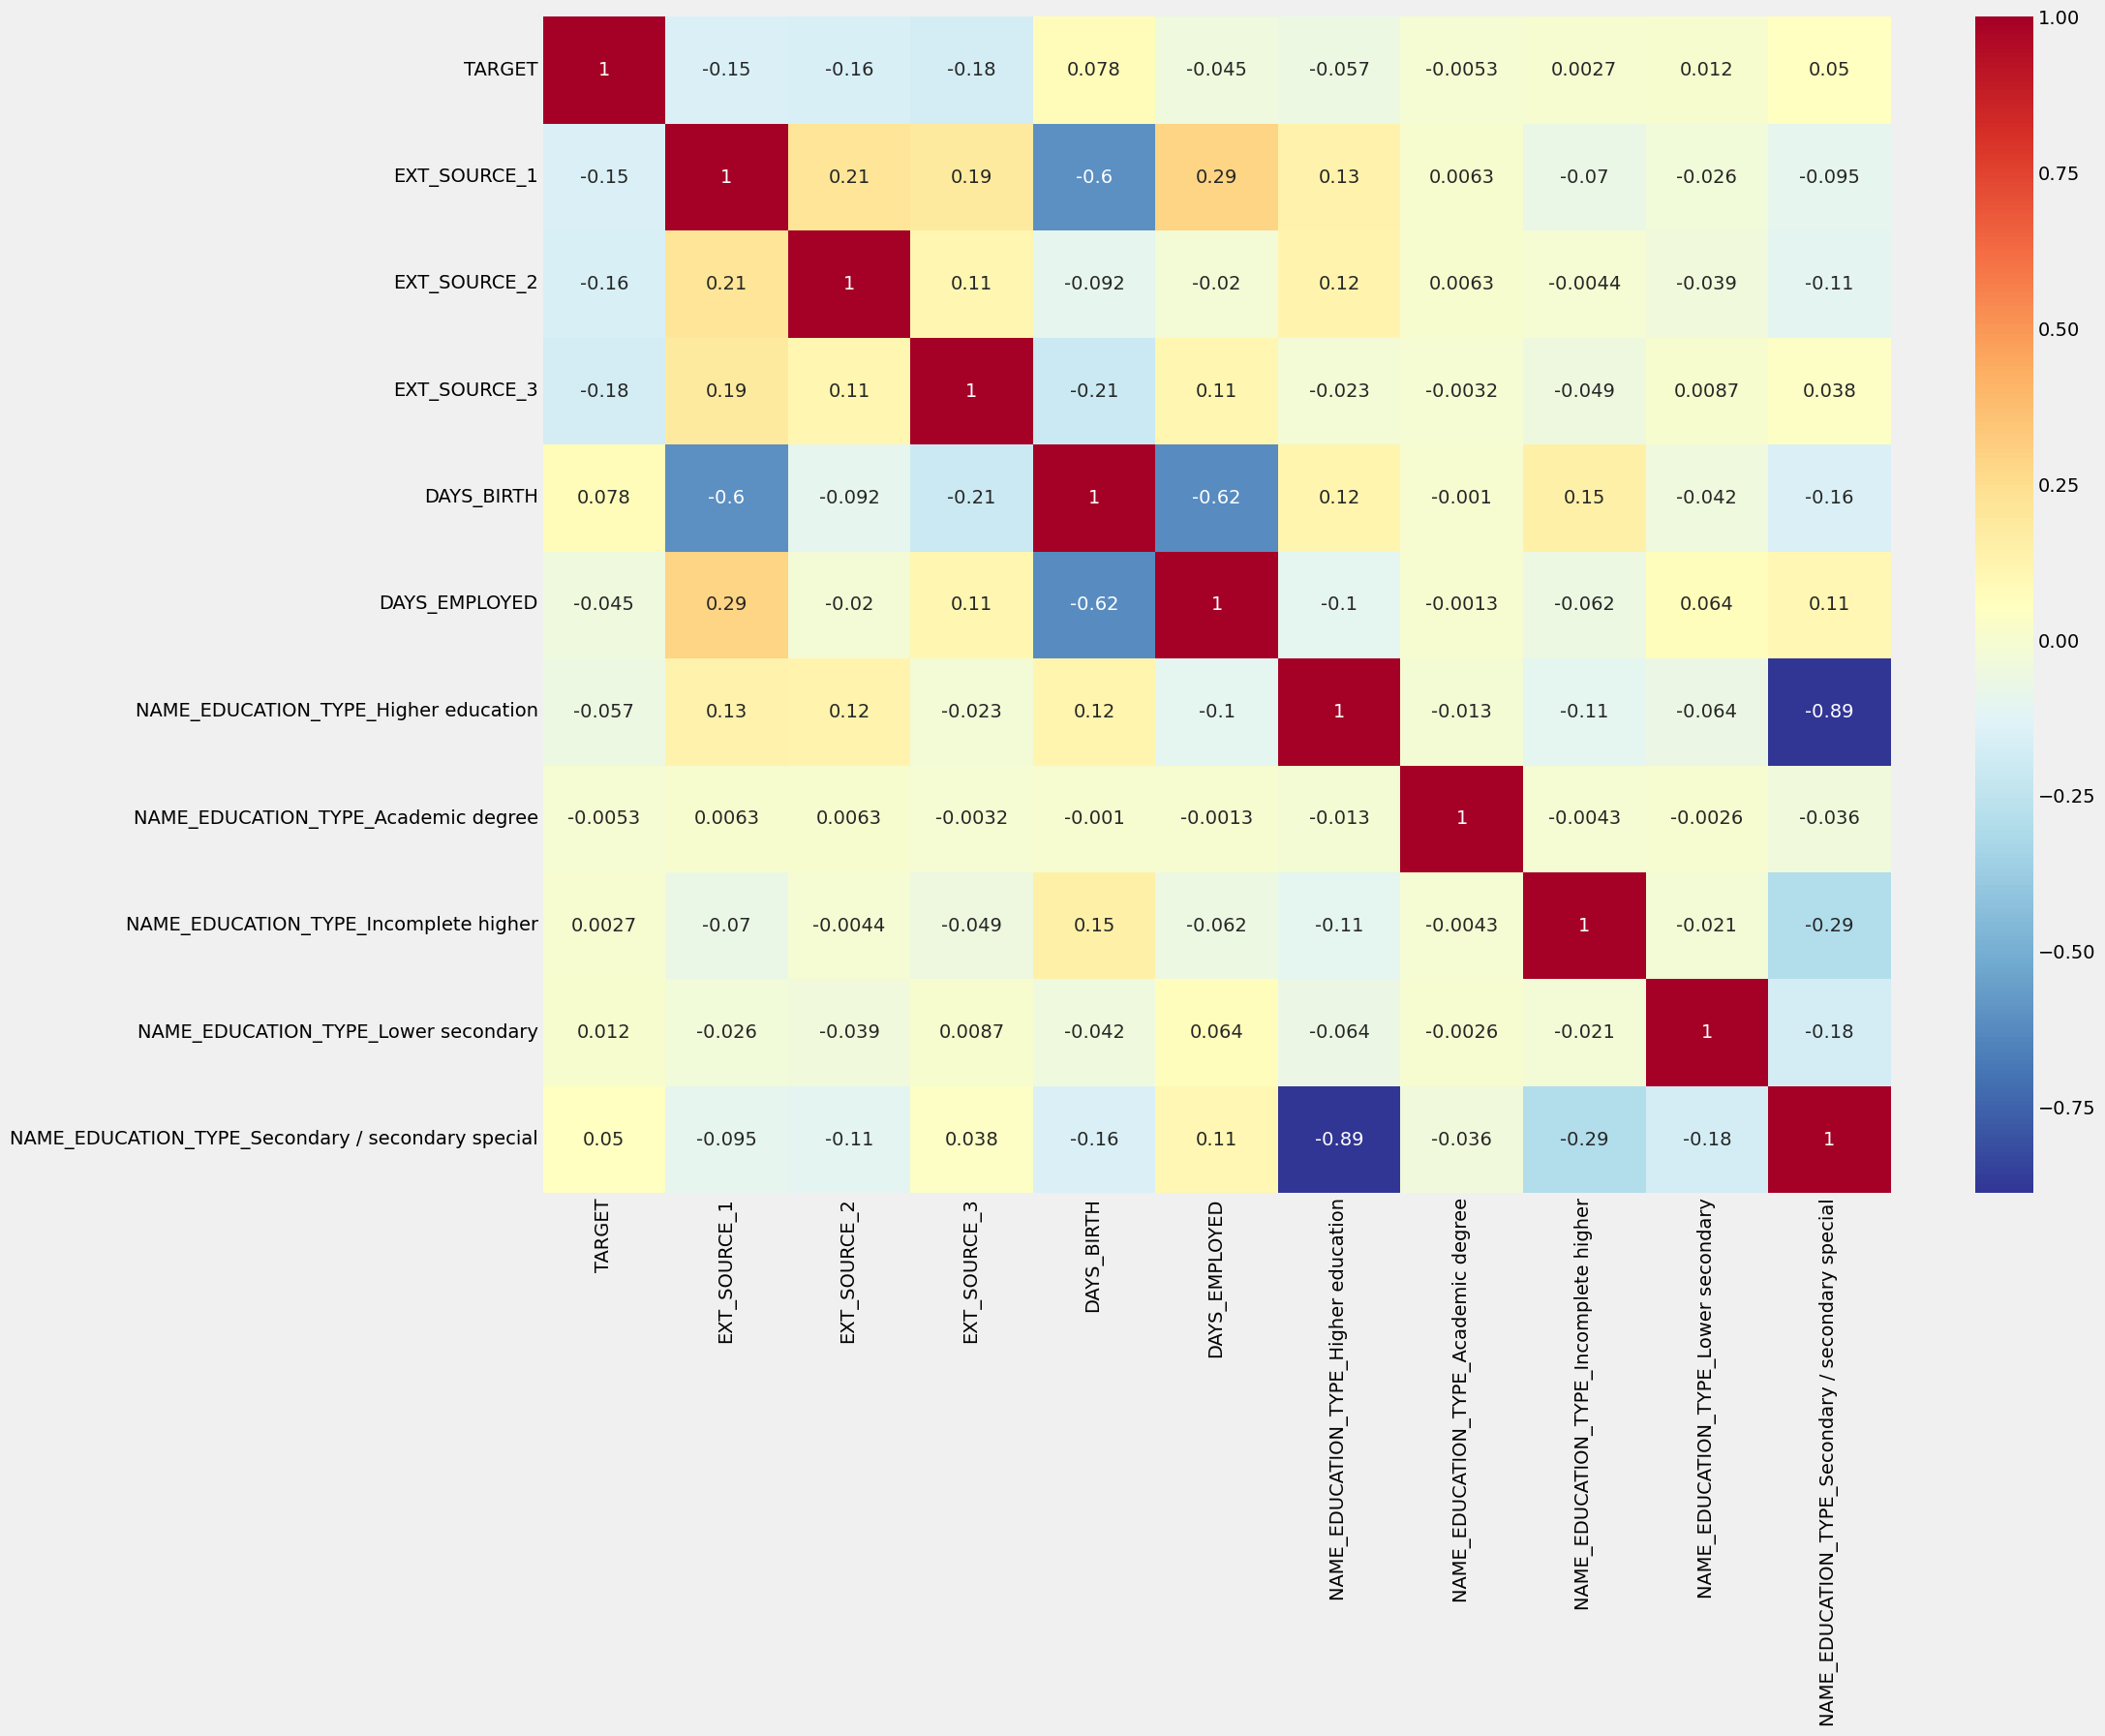

In [128]:
plt.figure(figsize=(20,15))
sns.heatmap(ext_data_corrs,cmap = plt.cm.RdYlBu_r,annot=True)
plt.show()

In [129]:
#DAYS_BIRTH 
train_labels = app_train['TARGET']
app_train['DAYS_BIRTH'][:5]

1   -16765
2   -19046
3   -19005
4   -19932
5   -16941
Name: DAYS_BIRTH, dtype: int64

In [130]:
(app_train['DAYS_BIRTH']/-365).describe()

count    306511.000000
mean         43.926696
std          11.954566
min          20.517808
25%          34.000000
50%          43.126027
75%          53.909589
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [131]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH']/365)
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED']/365)

In [132]:
(app_train['DAYS_EMPLOYED']).describe()

count    306511.000000
mean        185.723765
std         382.228512
min           0.000000
25%           2.553425
50%           6.063014
75%          15.460274
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

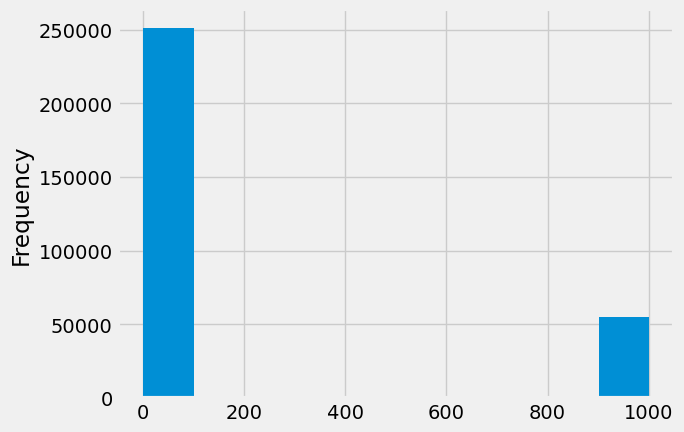

In [133]:
app_train['DAYS_EMPLOYED'].plot.hist()
plt.show()

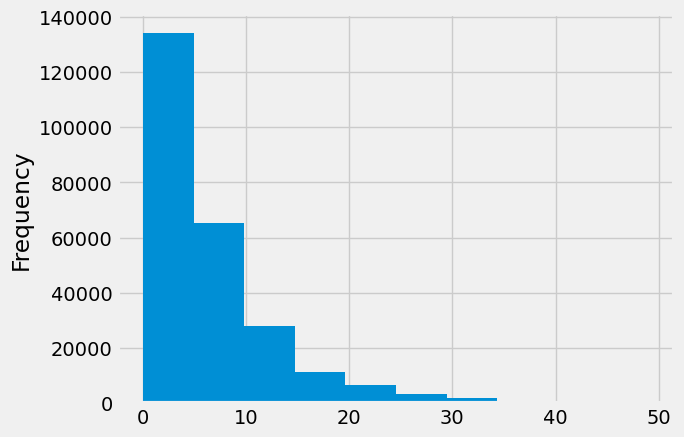

In [134]:
#EMPLOYED outlier detection clear
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == (365243/365)
app_train['DAYS_EMPLOYED'].replace({365243/365:np.nan},inplace=True)
app_train['DAYS_EMPLOYED'].plot.hist()
plt.show()

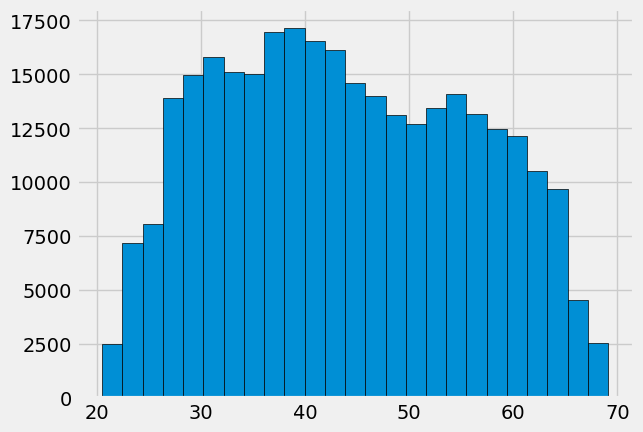

In [135]:
plt.style.use('fivethirtyeight')

plt.hist(app_train['DAYS_BIRTH'],edgecolor='k',bins=25)
plt.show()

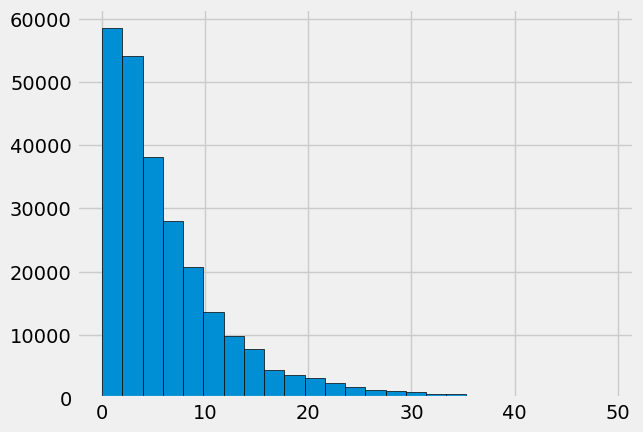

In [136]:
plt.style.use('fivethirtyeight')

plt.hist(app_train['DAYS_EMPLOYED'],edgecolor='k',bins=25)
plt.show()

In [137]:
# BIRTH unit from days to years
age_data1= app_train[['TARGET','DAYS_BIRTH']]
age_data1['YEARS_BIRTH'] = age_data1['DAYS_BIRTH']


age_data2= app_train[['TARGET','DAYS_EMPLOYED']]
age_data2['YEARS_EMPLOYED'] = age_data2['DAYS_EMPLOYED']

In [138]:
age_data1['YEARS_BINNED'] = pd.cut(age_data1['DAYS_BIRTH'],bins=np.linspace(20,70,num=11))
age_data1.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
1,0,45.931507,45.931507,"(45.0, 50.0]"
2,0,52.180822,52.180822,"(50.0, 55.0]"
3,0,52.068493,52.068493,"(50.0, 55.0]"
4,0,54.608219,54.608219,"(50.0, 55.0]"
5,0,46.413699,46.413699,"(45.0, 50.0]"


In [139]:
age_data2['YEARS_BINNED'] = pd.cut(age_data2['DAYS_EMPLOYED'],bins=np.linspace(0,50,num=11))
age_data2.head()

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED,YEARS_BINNED
1,0,3.254795,3.254795,"(0.0, 5.0]"
2,0,0.616438,0.616438,"(0.0, 5.0]"
3,0,8.326027,8.326027,"(5.0, 10.0]"
4,0,8.323288,8.323288,"(5.0, 10.0]"
5,0,4.350685,4.350685,"(0.0, 5.0]"


In [140]:
age_groups1 = age_data1.groupby('YEARS_BINNED').mean()
age_groups1

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.122727,23.378473,23.378473
"(25.0, 30.0]",0.111223,27.823544,27.823544
"(30.0, 35.0]",0.102439,32.479057,32.479057
"(35.0, 40.0]",0.089263,37.555266,37.555266
"(40.0, 45.0]",0.078464,42.458465,42.458465
"(45.0, 50.0]",0.074097,47.462945,47.462945
"(50.0, 55.0]",0.067164,52.592551,52.592551
"(55.0, 60.0]",0.055118,57.491321,57.491321
"(60.0, 65.0]",0.052534,62.412172,62.412172


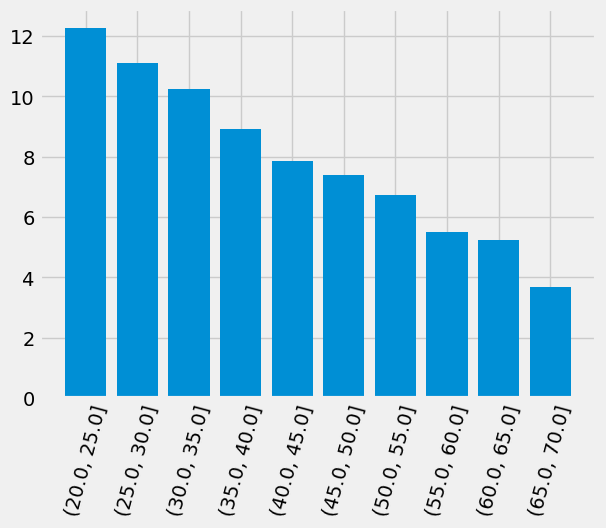

In [141]:
#YEARS_BIRTH distribution
plt.bar(age_groups1.index.astype(str),100*age_groups1['TARGET'])
plt.xticks(rotation=75)
plt.show()

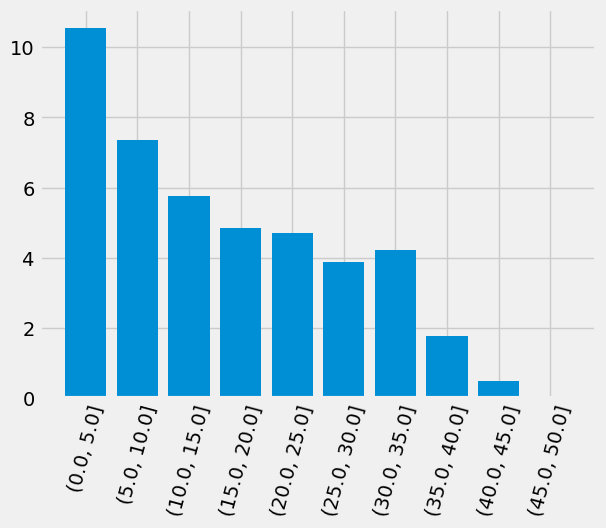

In [142]:
#YEARS_EMPLOYED distribution
age_groups2 = age_data2.groupby('YEARS_BINNED').mean()
plt.bar(age_groups2.index.astype(str),100*age_groups2['TARGET'])
plt.xticks(rotation=75)
plt.show()

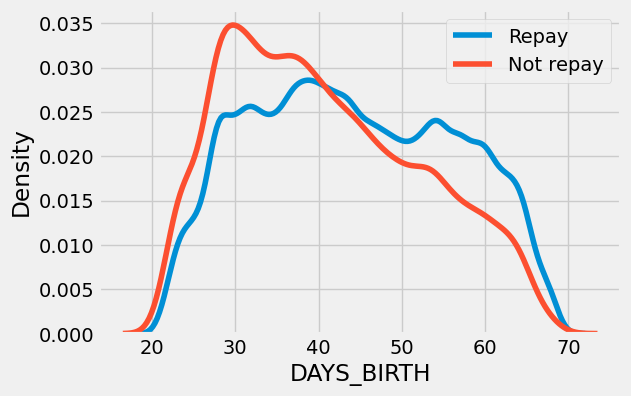

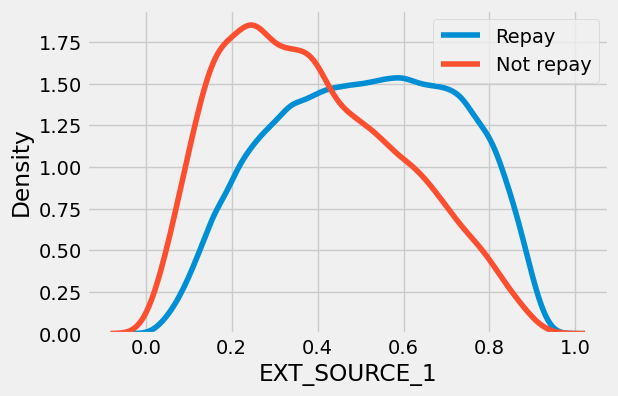

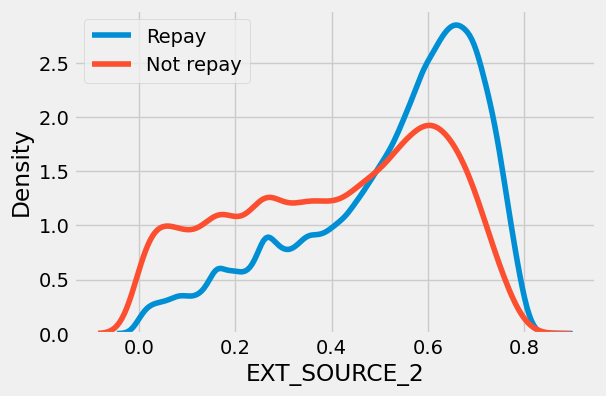

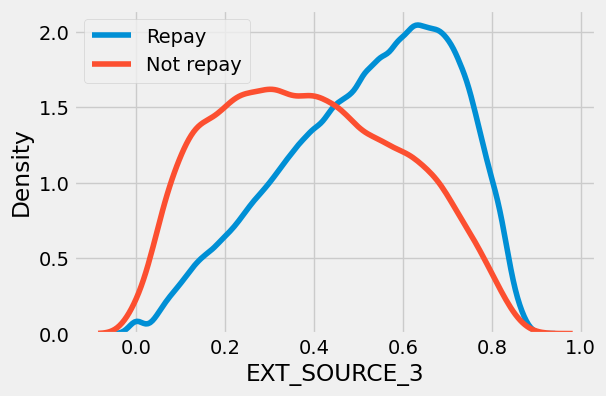

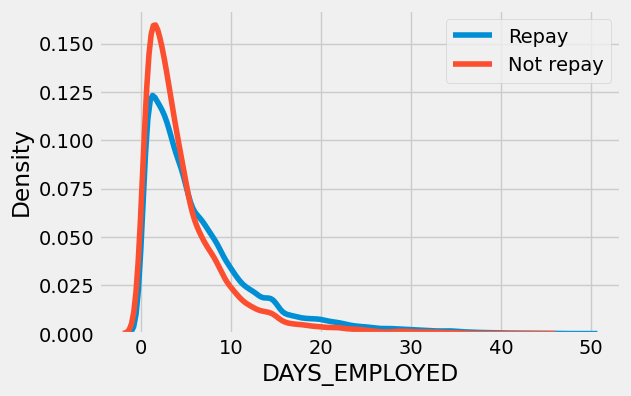

In [143]:
plt.figure(figsize=(6,4))
#KDEPLOT
sns.kdeplot(app_train.loc[app_train['TARGET']==0,'DAYS_BIRTH'],label='target==0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1,'DAYS_BIRTH'],label='target==1')
plt.legend(labels=['Repay','Not repay'] ,loc='best')
plt.show()

plt.figure(figsize=(6,4))
#KDEPLOT
sns.kdeplot(app_train.loc[app_train['TARGET']==0,'EXT_SOURCE_1'],label='target==0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1,'EXT_SOURCE_1'],label='target==1')
plt.legend(labels=['Repay','Not repay'] ,loc='best')
plt.show()

plt.figure(figsize=(6,4))
#KDEPLOT
sns.kdeplot(app_train.loc[app_train['TARGET']==0,'EXT_SOURCE_2'],label='target==0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1,'EXT_SOURCE_2'],label='target==1')
plt.legend(labels=['Repay','Not repay'] ,loc='best')
plt.show()

plt.figure(figsize=(6,4))
#KDEPLOT
sns.kdeplot(app_train.loc[app_train['TARGET']==0,'EXT_SOURCE_3'],label='target==0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1,'EXT_SOURCE_3'],label='target==1')
plt.legend(labels=['Repay','Not repay'] ,loc='best')
plt.show()


plt.figure(figsize=(6,4))
#KDEPLOT
sns.kdeplot(app_train.loc[app_train['TARGET']==0,'DAYS_EMPLOYED'],label='target==0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1,'DAYS_EMPLOYED'],label='target==1')
plt.legend(labels=['Repay','Not repay'] ,loc='best')
plt.show()

In [144]:
# 'Education' feature visualization
a1 = np.sum(app_train.loc[app_train['TARGET']==1,'NAME_EDUCATION_TYPE_Higher education'])
a0 = np.sum(app_train.loc[app_train['TARGET']==0,'NAME_EDUCATION_TYPE_Higher education'])
b1 = np.sum(app_train.loc[app_train['TARGET']==1,'NAME_EDUCATION_TYPE_Academic degree'])
b0 = np.sum(app_train.loc[app_train['TARGET']==0,'NAME_EDUCATION_TYPE_Academic degree'])
c1 = np.sum(app_train.loc[app_train['TARGET']==1,'NAME_EDUCATION_TYPE_Incomplete higher'])
c0 = np.sum(app_train.loc[app_train['TARGET']==0,'NAME_EDUCATION_TYPE_Incomplete higher'])
d1 = np.sum(app_train.loc[app_train['TARGET']==1,'NAME_EDUCATION_TYPE_Lower secondary'])
d0 = np.sum(app_train.loc[app_train['TARGET']==0,'NAME_EDUCATION_TYPE_Lower secondary'])
e1 = np.sum(app_train.loc[app_train['TARGET']==1,'NAME_EDUCATION_TYPE_Secondary / secondary special'])
e0 = np.sum(app_train.loc[app_train['TARGET']==0,'NAME_EDUCATION_TYPE_Secondary / secondary special'])

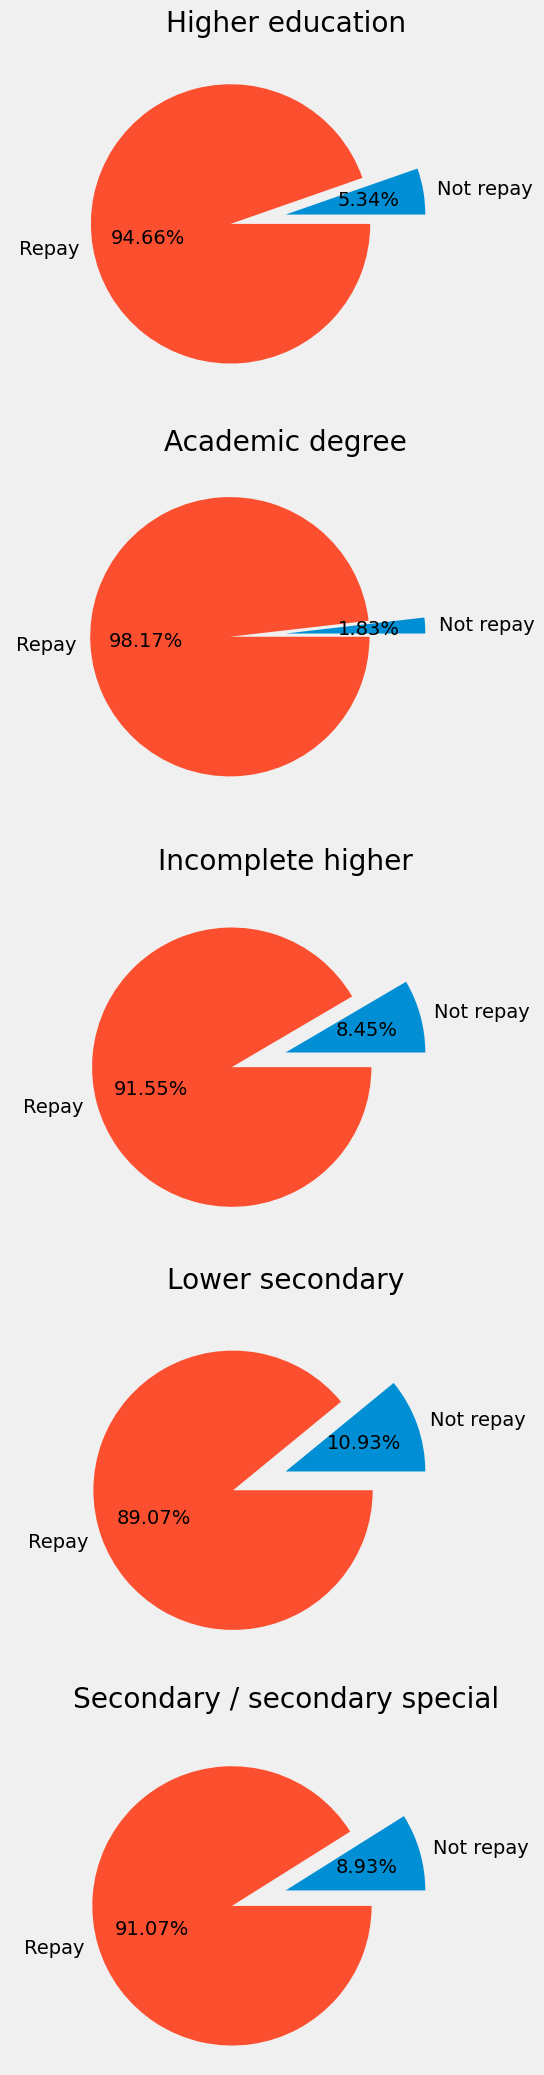

In [145]:
#pie plot
fig, axs = plt.subplots(5,figsize=(25, 25))
axs[0].pie([a1,a0],labels=['Not repay',' Repay'],autopct='%.2f%%',explode=(0, 0.4))
axs[0].set_title('Higher education')

axs[1].pie([b1,b0],labels=['Not repay',' Repay'],autopct='%.2f%%',explode=(0, 0.4))
axs[1].set_title('Academic degree')

axs[2].pie([c1,c0],labels=['Not repay',' Repay'],autopct='%.2f%%',explode=(0, 0.4))
axs[2].set_title('Incomplete higher')

axs[3].pie([d1,d0],labels=['Not repay',' Repay'],autopct='%.2f%%',explode=(0, 0.4))
axs[3].set_title('Lower secondary')

axs[4].pie([e1,e0],labels=['Not repay',' Repay'],autopct='%.2f%%',explode=(0, 0.4))
axs[4].set_title('Secondary / secondary special')

plt.show()

### Features engineering

In [146]:
poly_features = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED',
'NAME_EDUCATION_TYPE_Higher education','NAME_EDUCATION_TYPE_Academic degree','NAME_EDUCATION_TYPE_Incomplete higher',
'NAME_EDUCATION_TYPE_Lower secondary','NAME_EDUCATION_TYPE_Secondary / secondary special']]
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [147]:
#from pandas.core.interchange import column
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#Missing value padding
#imputer = SimpleImputer(strategy='mean')
#imputer = SimpleImputer(strategy='median')
imputer = IterativeImputer(max_iter=10, random_state=0)
poly_target = poly_features['TARGET']
poly_features.drop(columns=['TARGET'],axis=1,inplace =True)


poly_features = imputer.fit_transform(poly_features)


In [148]:
poly_transformer = PolynomialFeatures(degree=2)
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)

In [149]:
poly_features.shape

(306511, 66)

In [150]:
poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED',
'NAME_EDUCATION_TYPE_Higher education','NAME_EDUCATION_TYPE_Academic degree','NAME_EDUCATION_TYPE_Incomplete higher',
'NAME_EDUCATION_TYPE_Lower secondary','NAME_EDUCATION_TYPE_Secondary / secondary special'])
#poly_transformer.get_feature_names(input_features=['DAYS_EMPLOYED','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'])


['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_EMPLOYED',
 'EXT_SOURCE_1 NAME_EDUCATION_TYPE_Higher education',
 'EXT_SOURCE_1 NAME_EDUCATION_TYPE_Academic degree',
 'EXT_SOURCE_1 NAME_EDUCATION_TYPE_Incomplete higher',
 'EXT_SOURCE_1 NAME_EDUCATION_TYPE_Lower secondary',
 'EXT_SOURCE_1 NAME_EDUCATION_TYPE_Secondary / secondary special',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_EMPLOYED',
 'EXT_SOURCE_2 NAME_EDUCATION_TYPE_Higher education',
 'EXT_SOURCE_2 NAME_EDUCATION_TYPE_Academic degree',
 'EXT_SOURCE_2 NAME_EDUCATION_TYPE_Incomplete higher',
 'E

Combine the currently obtained partial features with the population

In [151]:
poly_features = pd.DataFrame(poly_features,columns=poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED',
'NAME_EDUCATION_TYPE_Higher education','NAME_EDUCATION_TYPE_Academic degree','NAME_EDUCATION_TYPE_Incomplete higher',
'NAME_EDUCATION_TYPE_Lower secondary','NAME_EDUCATION_TYPE_Secondary / secondary special']))
poly_features.head()

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,NAME_EDUCATION_TYPE_Academic degree^2,NAME_EDUCATION_TYPE_Academic degree NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Academic degree NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Incomplete higher^2,NAME_EDUCATION_TYPE_Incomplete higher NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Incomplete higher NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Lower secondary^2,NAME_EDUCATION_TYPE_Lower secondary NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Secondary / secondary special^2
0,1.0,0.311267,0.622246,0.423551,45.931507,3.254795,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.626932,0.555912,0.729567,52.180822,0.616438,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.631395,0.650442,0.548554,52.068493,8.326027,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.616795,0.322738,0.524494,54.608219,8.323288,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.534115,0.354225,0.621226,46.413699,4.350685,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [152]:
# poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
# app_train_poly = app_train.merge(poly_features,on='SK_ID_CURR',how='left')
# app_train_poly.head()

In [153]:
app_train_domain = app_train.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [154]:
poly_features['CREDIT_INCOME_PERCENT'] = app_train_domain['CREDIT_INCOME_PERCENT']
poly_features['ANNUITY_INCOME_PERCENT'] = app_train_domain['ANNUITY_INCOME_PERCENT']
poly_features['CREDIT_TERM'] = app_train_domain['CREDIT_TERM']
poly_features['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED_PERCENT']
a = poly_features

Create features based on the actual situation

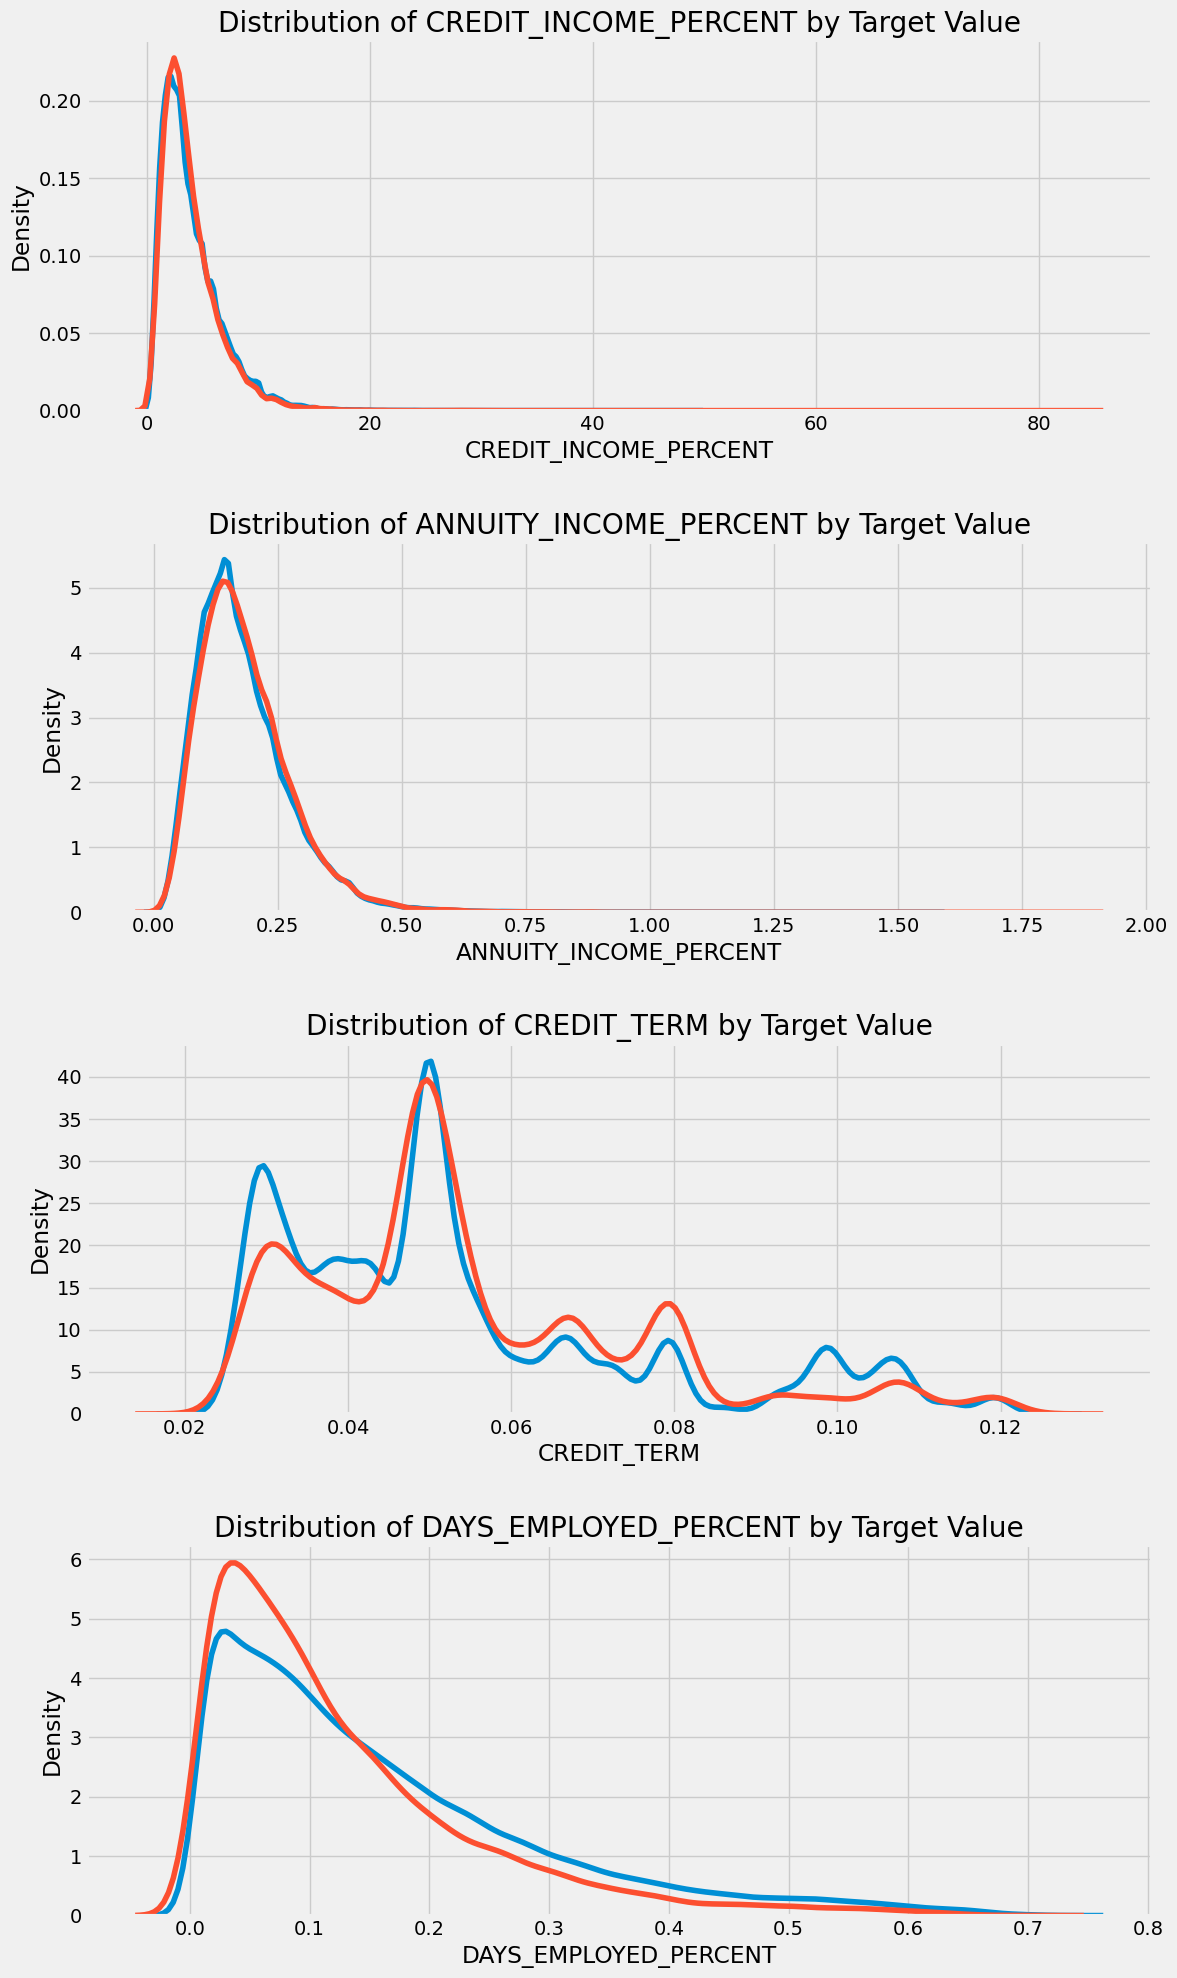

In [155]:
plt.figure(figsize = (12, 20))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    plt.subplot(4, 1, i + 1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
plt.show()

In [156]:
poly_features['TARGET'] = app_train['TARGET']
correlations = poly_features.corr()['TARGET'].sort_values()
pd.set_option('display.max_rows', None)
print(correlations)

DAYS_EMPLOYED_PERCENT                                                                     -0.067741
CREDIT_INCOME_PERCENT                                                                     -0.007721
EXT_SOURCE_1                                                                              -0.002640
EXT_SOURCE_1^2                                                                            -0.002351
EXT_SOURCE_1 EXT_SOURCE_3                                                                 -0.002246
EXT_SOURCE_3                                                                              -0.002214
EXT_SOURCE_3^2                                                                            -0.002054
EXT_SOURCE_3 DAYS_EMPLOYED                                                                -0.001762
EXT_SOURCE_1 DAYS_BIRTH                                                                   -0.001599
EXT_SOURCE_2 NAME_EDUCATION_TYPE_Lower secondary                                          -0.001349


Data Preprocessing

In [157]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
label = app_train['TARGET']
train = poly_features
train,test,y_train,y_test= train_test_split(train,label,test_size = 0.2,random_state = 0)
features = list(train.columns)

imputer = SimpleImputer(strategy='median')
#imputer = IterativeImputer(max_iter=10, random_state=0)
std = StandardScaler()
 
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

std.fit(train)
train = std.transform(train)
test = std.transform(test)




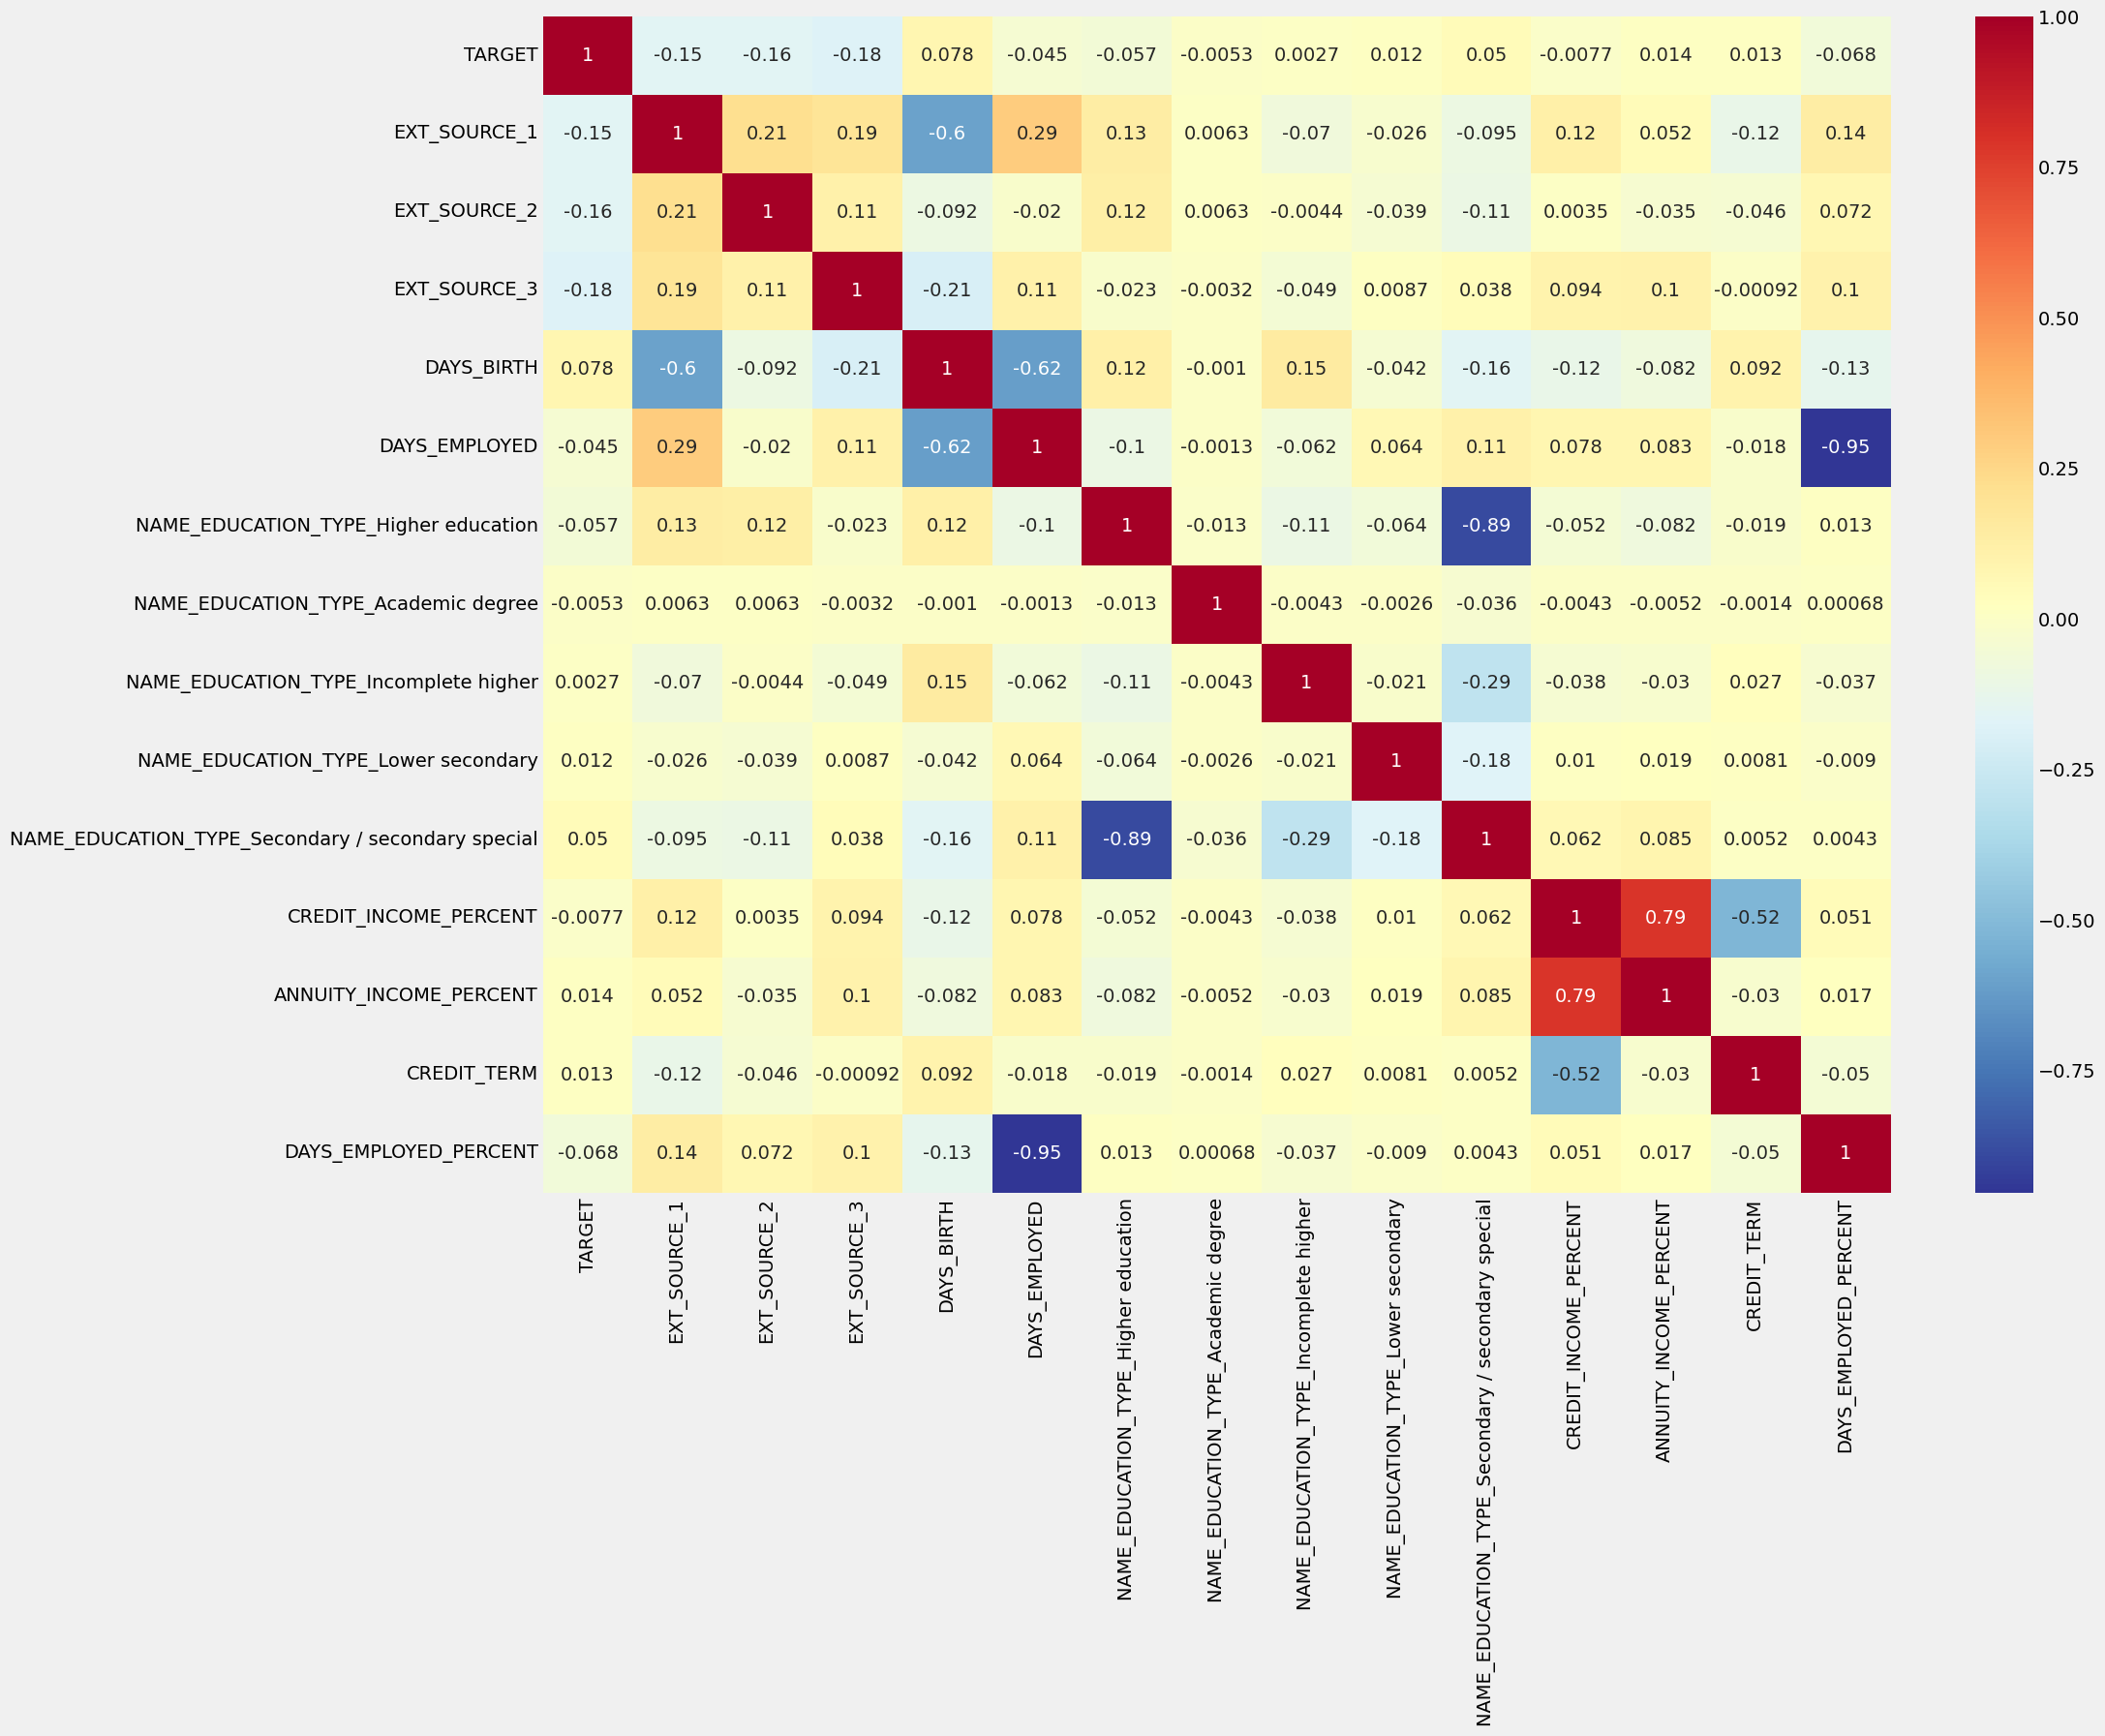

In [159]:
ext_data['CREDIT_INCOME_PERCENT'] = app_train_domain['CREDIT_INCOME_PERCENT']
ext_data['ANNUITY_INCOME_PERCENT'] = app_train_domain['ANNUITY_INCOME_PERCENT']
ext_data['CREDIT_TERM'] = app_train_domain['CREDIT_TERM']
ext_data['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED_PERCENT']

ext_data_corrs = ext_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(ext_data_corrs,cmap = plt.cm.RdYlBu_r,annot=True)
plt.show()



### Model 1:logistic Regression

In [43]:
## GridSearch
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
# scoring = {
#     'accuracy': make_scorer(accuracy_score),
#     'sensitivity': make_scorer(recall_score),
#     'specificity': make_scorer(recall_score,pos_label=0)
# }

specificity = make_scorer(recall_score)
# penaltys = ['l1','l2']
# Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# tuned_parameters = dict(penalty = penaltys, C = Cs)


# lr_penalty= LogisticRegression()
# grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring= specificity)
# grid.fit(train,y_train)

# grid.cv_results_

# print(-grid.best_score_)
# print(grid.best_params_)

In [44]:
model = LogisticRegression(C=10,penalty='l2')
log_reg = model.fit(train,y_train)
y_pred = log_reg.predict(test)

# 10 Fold-CV
print('Test Accuracry')
print(np.mean(cross_val_score(log_reg, train, y_train, cv=10)))

Test Accuracry
0.919317478183796


Text(0, 0.5, 'TPR')

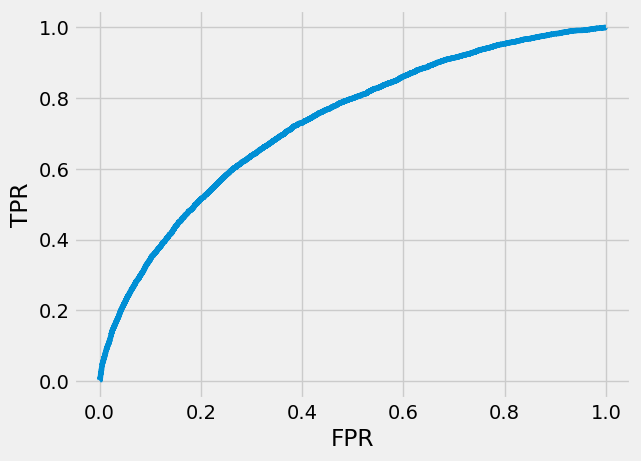

In [45]:
from sklearn.metrics import roc_curve
fpr1,tpr1, thresholds1 = roc_curve(y_test,log_reg.decision_function(test))
 
plt.plot(fpr1,tpr1,label='ROC')
 
plt.xlabel('FPR')
plt.ylabel('TPR')

In [46]:
# Performance Evaluation
# Accuracy 
from sklearn.metrics import accuracy_score

# AUC
from sklearn.metrics import roc_auc_score
predictions = log_reg.predict_proba(test)[:,1]
test_auc = roc_auc_score(y_test,predictions)

# score-report
from sklearn.metrics import classification_report

# kappa-score
from sklearn.metrics import cohen_kappa_score

print('Logestic Regress:\n', 'accuracy =',accuracy_score(y_test, y_pred)*100,'\n',
      'AUC =' ,test_auc,'\n', 'kappa-score =',cohen_kappa_score(y_test,y_pred),'\n',
      'scores table =','\n',classification_report(y_test,y_pred),'\n')

Logestic Regress:
 accuracy = 92.01833515488639 
 AUC = 0.7289474346838694 
 kappa-score = 0.005805556677596302 
 scores table = 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56410
           1       0.50      0.00      0.01      4893

    accuracy                           0.92     61303
   macro avg       0.71      0.50      0.48     61303
weighted avg       0.89      0.92      0.88     61303
 



[[   17  4876]
 [   17 56393]]


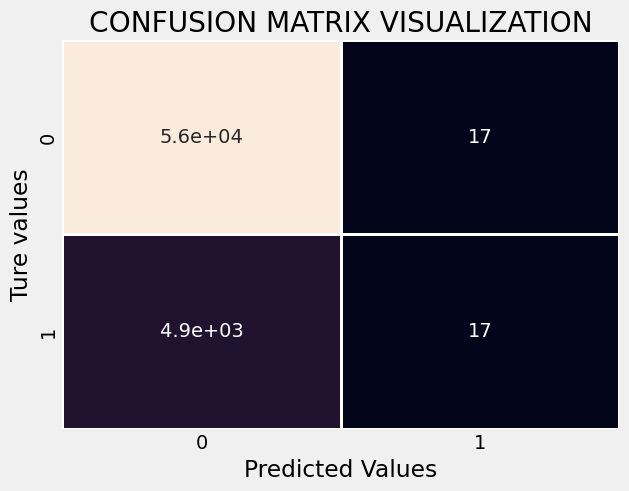

In [47]:
# Confusion Matrix 
print(confusion_matrix(y_test, y_pred,labels=[1,0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("Ture values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()


### Model 2:Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# model = RandomForestClassifier(n_estimators=1000,random_state=10,n_jobs=-1)
# random_forest = model.fit(train,y_train)
# y_pred = random_forest.predict(test)

In [49]:
# Create the parameter grid based on the results of random search 
param_grid = {
#     'bootstrap': [True],
#     'max_depth': [110, 120, 200 ,230],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [2, 8, 10],
    'n_estimators': [100, 200, 300,1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3,scoring= specificity, n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(train,y_train)
print(grid_search.best_params_)

# best_grid = grid_search.best_estimator_
# grid_accuracy = evaluate(best_grid, test_features, test_labels)

# print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'n_estimators': 100}


In [50]:
model = RandomForestClassifier(bootstrap=True,max_depth=110,max_features=2,min_samples_leaf=3,min_samples_split=2,n_estimators=100)

# 10 Fold-CV
print('Test Accuracry')
print(np.mean(cross_val_score(log_reg, traiSn, y_train, cv=10)))

random_forest = model.fit(train,y_train)
y_pred = random_forest.predict(test)
# 110 2 3 2

Test Accuracry
0.919317478183796


Text(0, 0.5, 'TPR')

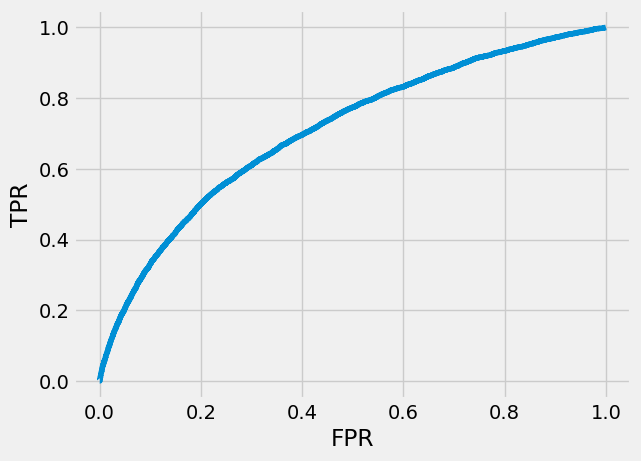

In [51]:
pre_y = random_forest.predict_proba(test)[:, 1]

fpr2,tpr2, thresholds2 = roc_curve(y_test,pre_y)
 
plt.plot(fpr2,tpr2,label='ROC')
 
plt.xlabel('FPR')
plt.ylabel('TPR')

In [52]:
# Performance Evaluation
# Accuracy 
from sklearn.metrics import accuracy_score

# AUC
from sklearn.metrics import roc_auc_score
predictions = random_forest.predict_proba(test)[:,1]
test_auc = roc_auc_score(y_test,predictions)

# score-report
from sklearn.metrics import classification_report

# kappa-score
from sklearn.metrics import cohen_kappa_score

print('Random Forest:\n', 'accuracy =',accuracy_score(y_test, y_pred)*100,'\n',
      'AUC =' ,test_auc,'\n', 'kappa-score =',cohen_kappa_score(y_test,y_pred),'\n',
      'scores table =','\n',classification_report(y_test,y_pred),'\n')

Random Forest:
 accuracy = 91.99223529027944 
 AUC = 0.7083798753346432 
 kappa-score = 0.009992561697031332 
 scores table = 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56410
           1       0.40      0.01      0.01      4893

    accuracy                           0.92     61303
   macro avg       0.66      0.50      0.49     61303
weighted avg       0.88      0.92      0.88     61303
 



[[   31  4862]
 [   47 56363]]


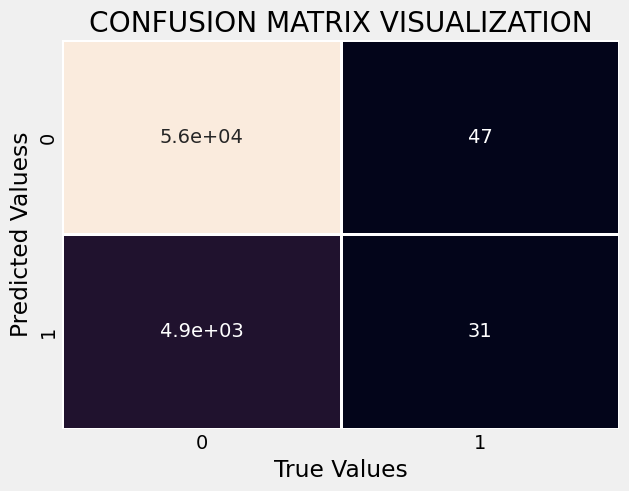

In [53]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred,labels=[1,0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("Predicted Valuess")
plt.xlabel("True Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [54]:
importances = random_forest.feature_importances_
forest_importances = pd.Series(importances,index=features)
forest_importances_sorted = forest_importances.sort_values(ascending=False)
result = permutation_importance(random_forest, test, y_test, n_repeats=2, random_state=10, n_jobs=-1)

In [55]:
result.importances_std

array([0.00000000e+00, 8.15620769e-06, 1.63124154e-05, 4.89372461e-05,
       1.63124154e-05, 0.00000000e+00, 3.26248308e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.44686231e-05, 5.70934538e-05,
       8.15620769e-06, 4.89372461e-05, 8.15620769e-05, 4.07810384e-05,
       1.63124154e-05, 0.00000000e+00, 8.15620769e-06, 0.00000000e+00,
       8.15620769e-06, 8.15620769e-06, 0.00000000e+00, 8.15620769e-06,
       3.26248308e-05, 1.63124154e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.63124154e-05, 8.15620769e-06, 4.89372461e-05,
       0.00000000e+00, 2.44686231e-05, 0.00000000e+00, 8.15620769e-06,
       0.00000000e+00, 4.89372461e-05, 3.26248308e-05, 8.15620769e-06,
       1.63124154e-05, 0.00000000e+00, 8.15620769e-06, 0.00000000e+00,
       2.44686231e-05, 8.15620769e-06, 0.00000000e+00, 0.00000000e+00,
       8.15620769e-06, 0.00000000e+00, 2.44686231e-05, 1.63124154e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

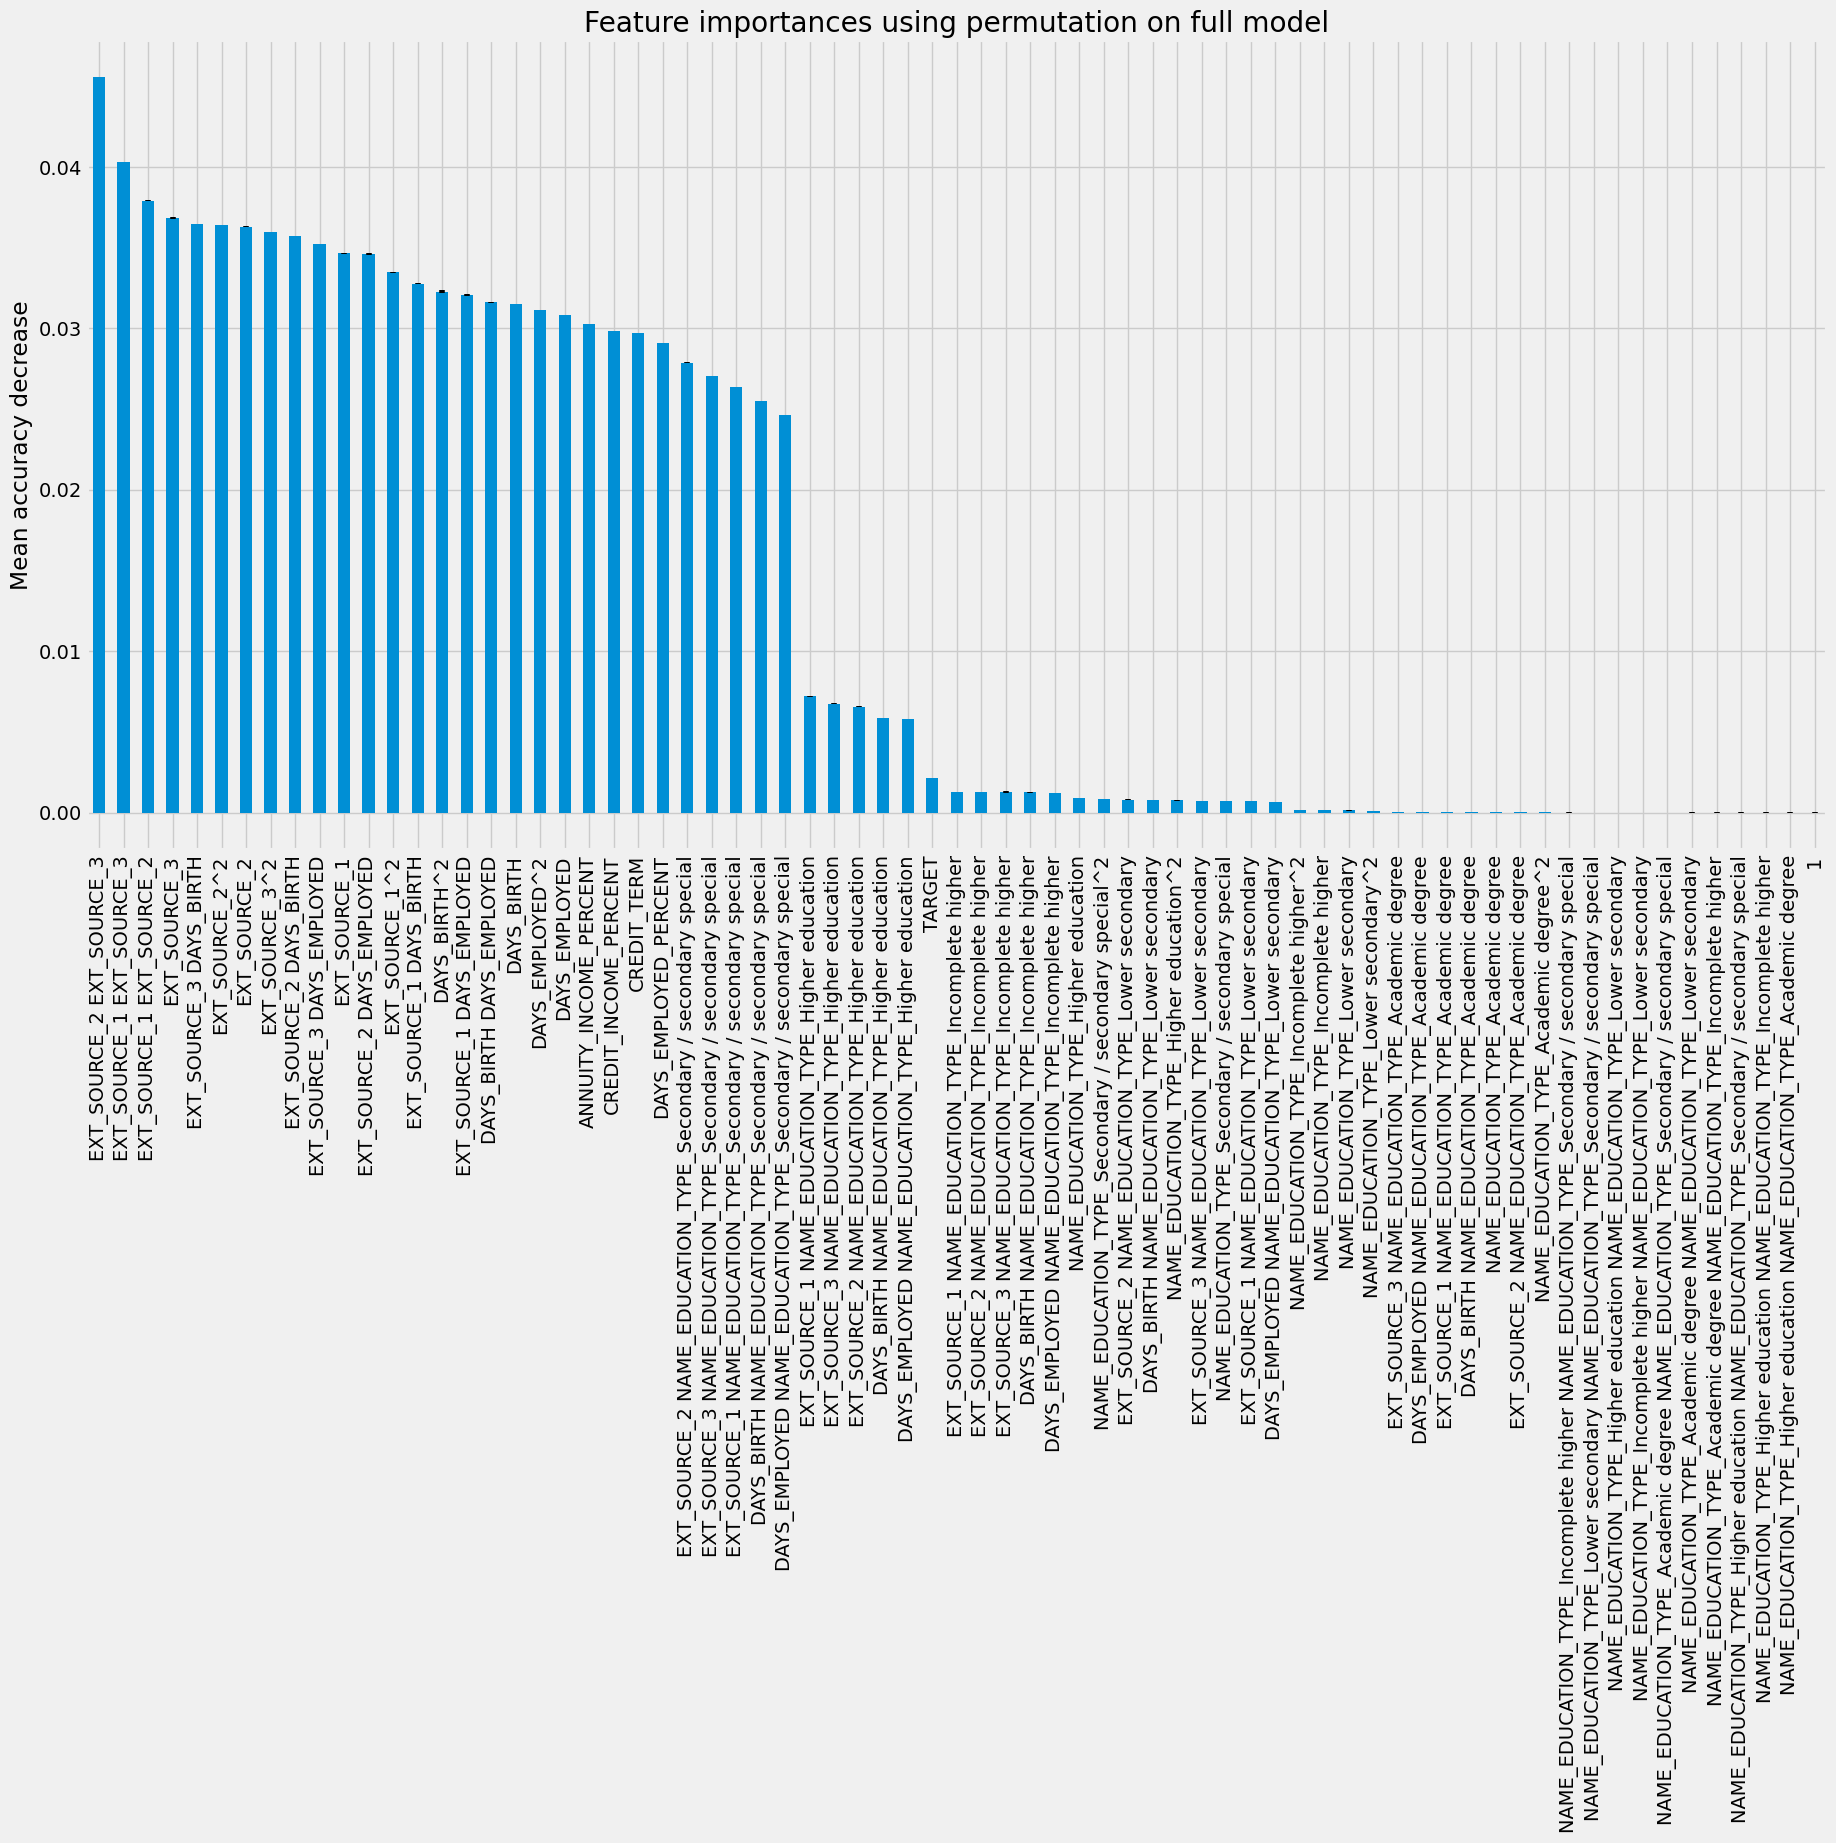

In [56]:
plt.figure(figsize = (20, 10))
forest_importances_sorted.plot.bar(yerr=result.importances_std)
plt.title("Feature importances using permutation on full model")
plt.ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Model 3: Lightgbm

In [57]:
# GridSearch 

# y_pred = model.predict(test)
# parameters = { 
#     'learning_rate' : [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5] ,'num_iterations' : [100,200,300,500] 

# }                    
# gbm = lgb.LGBMClassifier(objective = 'binary',
#                          is_unbalance = True,
#                          metric = 'binary_logloss,auc',
#                          max_depth = 6,
#                          num_leaves = 40,
#                          learning_rate = 0.1,
#                          feature_fraction = 0.7,
#                          min_child_samples=21,
#                          min_child_weight=0.001,
#                          bagging_fraction = 1,
#                          bagging_freq = 2,
#                          reg_alpha = 0.001,
#                          reg_lambda = 8,
#                          cat_smooth = 0,
#                          num_iterations = 200,   
#                         )
# gsearch = GridSearchCV(gbm, param_grid=parameters, scoring= specificity, cv=3)
# gsearch.fit(train, y_train)
# print('参数的最佳取值:{0}'.format(gsearch.best_params_))
# print('最佳模型得分:{0}'.format(gsearch.best_score_))
# print(gsearch.cv_results_['mean_test_score'])
# print(gsearch.cv_results_['params'])


In [58]:
model = lgb.LGBMClassifier(is_unbalance = True,objective = 'binary', max_depth = 4, num_leaves = 20, min_child_samples = 19, min_child_weight = 0.001,
bagging_fraction = 1, feature_fraction = 0.6,  bagging_freq = 2, cat_smooth = 0,reg_lambda = 0.03,
reg_alpha = 0.01, metric = 'binary_logloss,auc',learning_rate = 0.05,num_iterations = 100)

# n_estimators=10000, objective = 'binary', max_depth = 4, num_leaves = 20, min_child_samples = 19, min_child_weight = 0.001,
# bagging_fraction = 1, feature_fraction = 0.6,  bagging_freq = 2, cat_smooth = 0,reg_lambda = 0.03,
# reg_alpha = 0.01, metric = 'binary_logloss,auc',learning_rate = 0.05,num_iterations = 100
light_gbm = model.fit(train, y_train, eval_metric = 'auc',
          eval_set = [(test, y_test), (train, y_train)],
          eval_names = ['test', 'train'],
          early_stopping_rounds = 100, verbose = 100)
# 10 Fold-CV
print('Test Accuracry')
print(np.mean(cross_val_score(log_reg, train, y_train, cv=10)))
y_pred = model.predict(test)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Training until validation scores don't improve for 100 rounds
[100]	train's auc: 0.745336	train's binary_logloss: 0.592245	test's auc: 0.730174	test's binary_logloss: 0.592962
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.745336	train's binary_logloss: 0.592245	test's auc: 0.730174	test's binary_logloss: 0.592962
Test Accuracry
0.919317478183796


Text(0, 0.5, 'TPR')

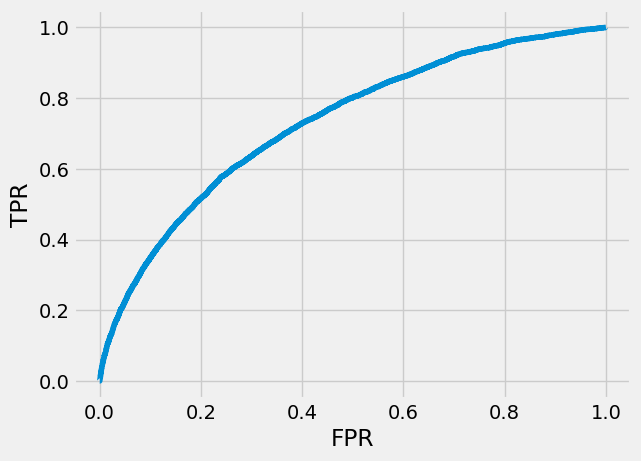

In [59]:
pre_ylight = light_gbm.predict_proba(test)[:, 1]

fpr3,tpr3, thresholds3 = roc_curve(y_test,pre_ylight)
 
plt.plot(fpr3,tpr3,label='ROC')
 
plt.xlabel('FPR')
plt.ylabel('TPR')

Text(0, 0.5, 'TPR')

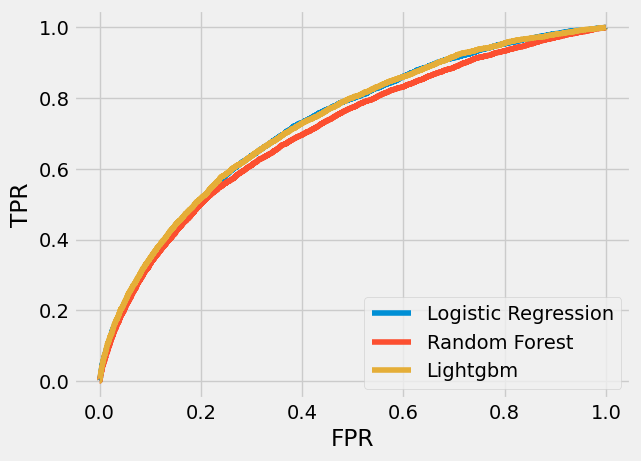

In [60]:
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.plot(fpr3,tpr3)

plt.legend(['Logistic Regression','Random Forest','Lightgbm'])
plt.xlabel('FPR')
plt.ylabel('TPR')

[[ 3205  1688]
 [17942 38468]]


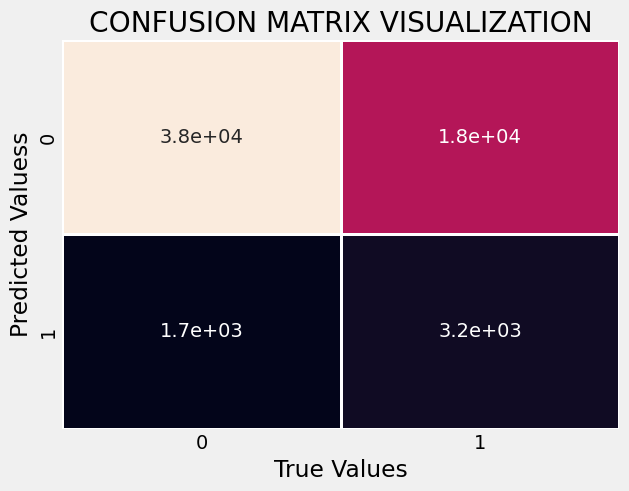

LightGBM:
 accuracy = 67.97872861034533


In [61]:
print(confusion_matrix(y_test, y_pred,labels=[1,0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("Predicted Valuess")
plt.xlabel("True Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()
print('LightGBM:\n', 'accuracy =',accuracy_score(y_test, y_pred)*100)

In [62]:
# Performance Evaluation
# Accuracy 
from sklearn.metrics import accuracy_score

# AUC
from sklearn.metrics import roc_auc_score
predictions = model.predict_proba(test)[:,1]
test_auc = roc_auc_score(y_test,predictions)

# score-report
from sklearn.metrics import classification_report

# kappa-score
from sklearn.metrics import cohen_kappa_score

print('LightGBM:\n', 'accuracy =',accuracy_score(y_test, y_pred)*100,'\n',
      'AUC =' ,test_auc,'\n', 'kappa-score =',cohen_kappa_score(y_test,y_pred),
      'scores table =','\n',classification_report(y_test,y_pred),'\n') 

LightGBM:
 accuracy = 67.97872861034533 
 AUC = 0.7301736056049015 
 kappa-score = 0.1338776585458411 scores table = 
               precision    recall  f1-score   support

           0       0.96      0.68      0.80     56410
           1       0.15      0.66      0.25      4893

    accuracy                           0.68     61303
   macro avg       0.55      0.67      0.52     61303
weighted avg       0.89      0.68      0.75     61303
 



In [63]:
importances1 = model.feature_importances_
lgbm_importances = pd.Series(importances1,index=features)
lgbm_importances_sorted = lgbm_importances.sort_values(ascending=False)
lgbm_importances_sorted

EXT_SOURCE_2 EXT_SOURCE_3                                                                  139
EXT_SOURCE_1 EXT_SOURCE_3                                                                  121
EXT_SOURCE_1 EXT_SOURCE_2                                                                  110
DAYS_BIRTH^2                                                                                99
DAYS_BIRTH                                                                                  88
EXT_SOURCE_3 DAYS_EMPLOYED                                                                  62
EXT_SOURCE_1 DAYS_EMPLOYED                                                                  59
EXT_SOURCE_3                                                                                52
EXT_SOURCE_1                                                                                45
DAYS_BIRTH NAME_EDUCATION_TYPE_Secondary / secondary special                                44
EXT_SOURCE_2                                      

In [64]:
result1 = permutation_importance(light_gbm, test, y_test, n_repeats=30, random_state=0, n_jobs=-1)

In [65]:
result1.importances_std

array([0.00000000e+00, 5.53571215e-04, 2.87207651e-04, 5.87879977e-04,
       4.46822901e-04, 2.07515610e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.04652033e-04,
       7.44102866e-04, 1.00341025e-03, 1.28439483e-04, 5.60637094e-04,
       4.22348424e-04, 0.00000000e+00, 2.01700156e-05, 5.31761390e-05,
       2.16077768e-04, 3.15205039e-04, 9.40826561e-04, 1.55663716e-04,
       4.91053980e-04, 2.77070536e-04, 2.33494941e-05, 2.00597760e-05,
       4.89976252e-05, 2.70565996e-04, 3.33820029e-04, 2.91260246e-04,
       3.97722721e-04, 2.41113098e-04, 0.00000000e+00, 5.15413818e-05,
       2.92816817e-06, 2.57249888e-04, 3.02049478e-04, 6.31332391e-05,
       1.43248231e-04, 3.31462857e-05, 2.92816817e-06, 0.00000000e+00,
       3.36420910e-04, 1.42432703e-04, 3.72107454e-04, 0.00000000e+00,
       3.98422374e-05, 7.11644376e-05, 1.32656483e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

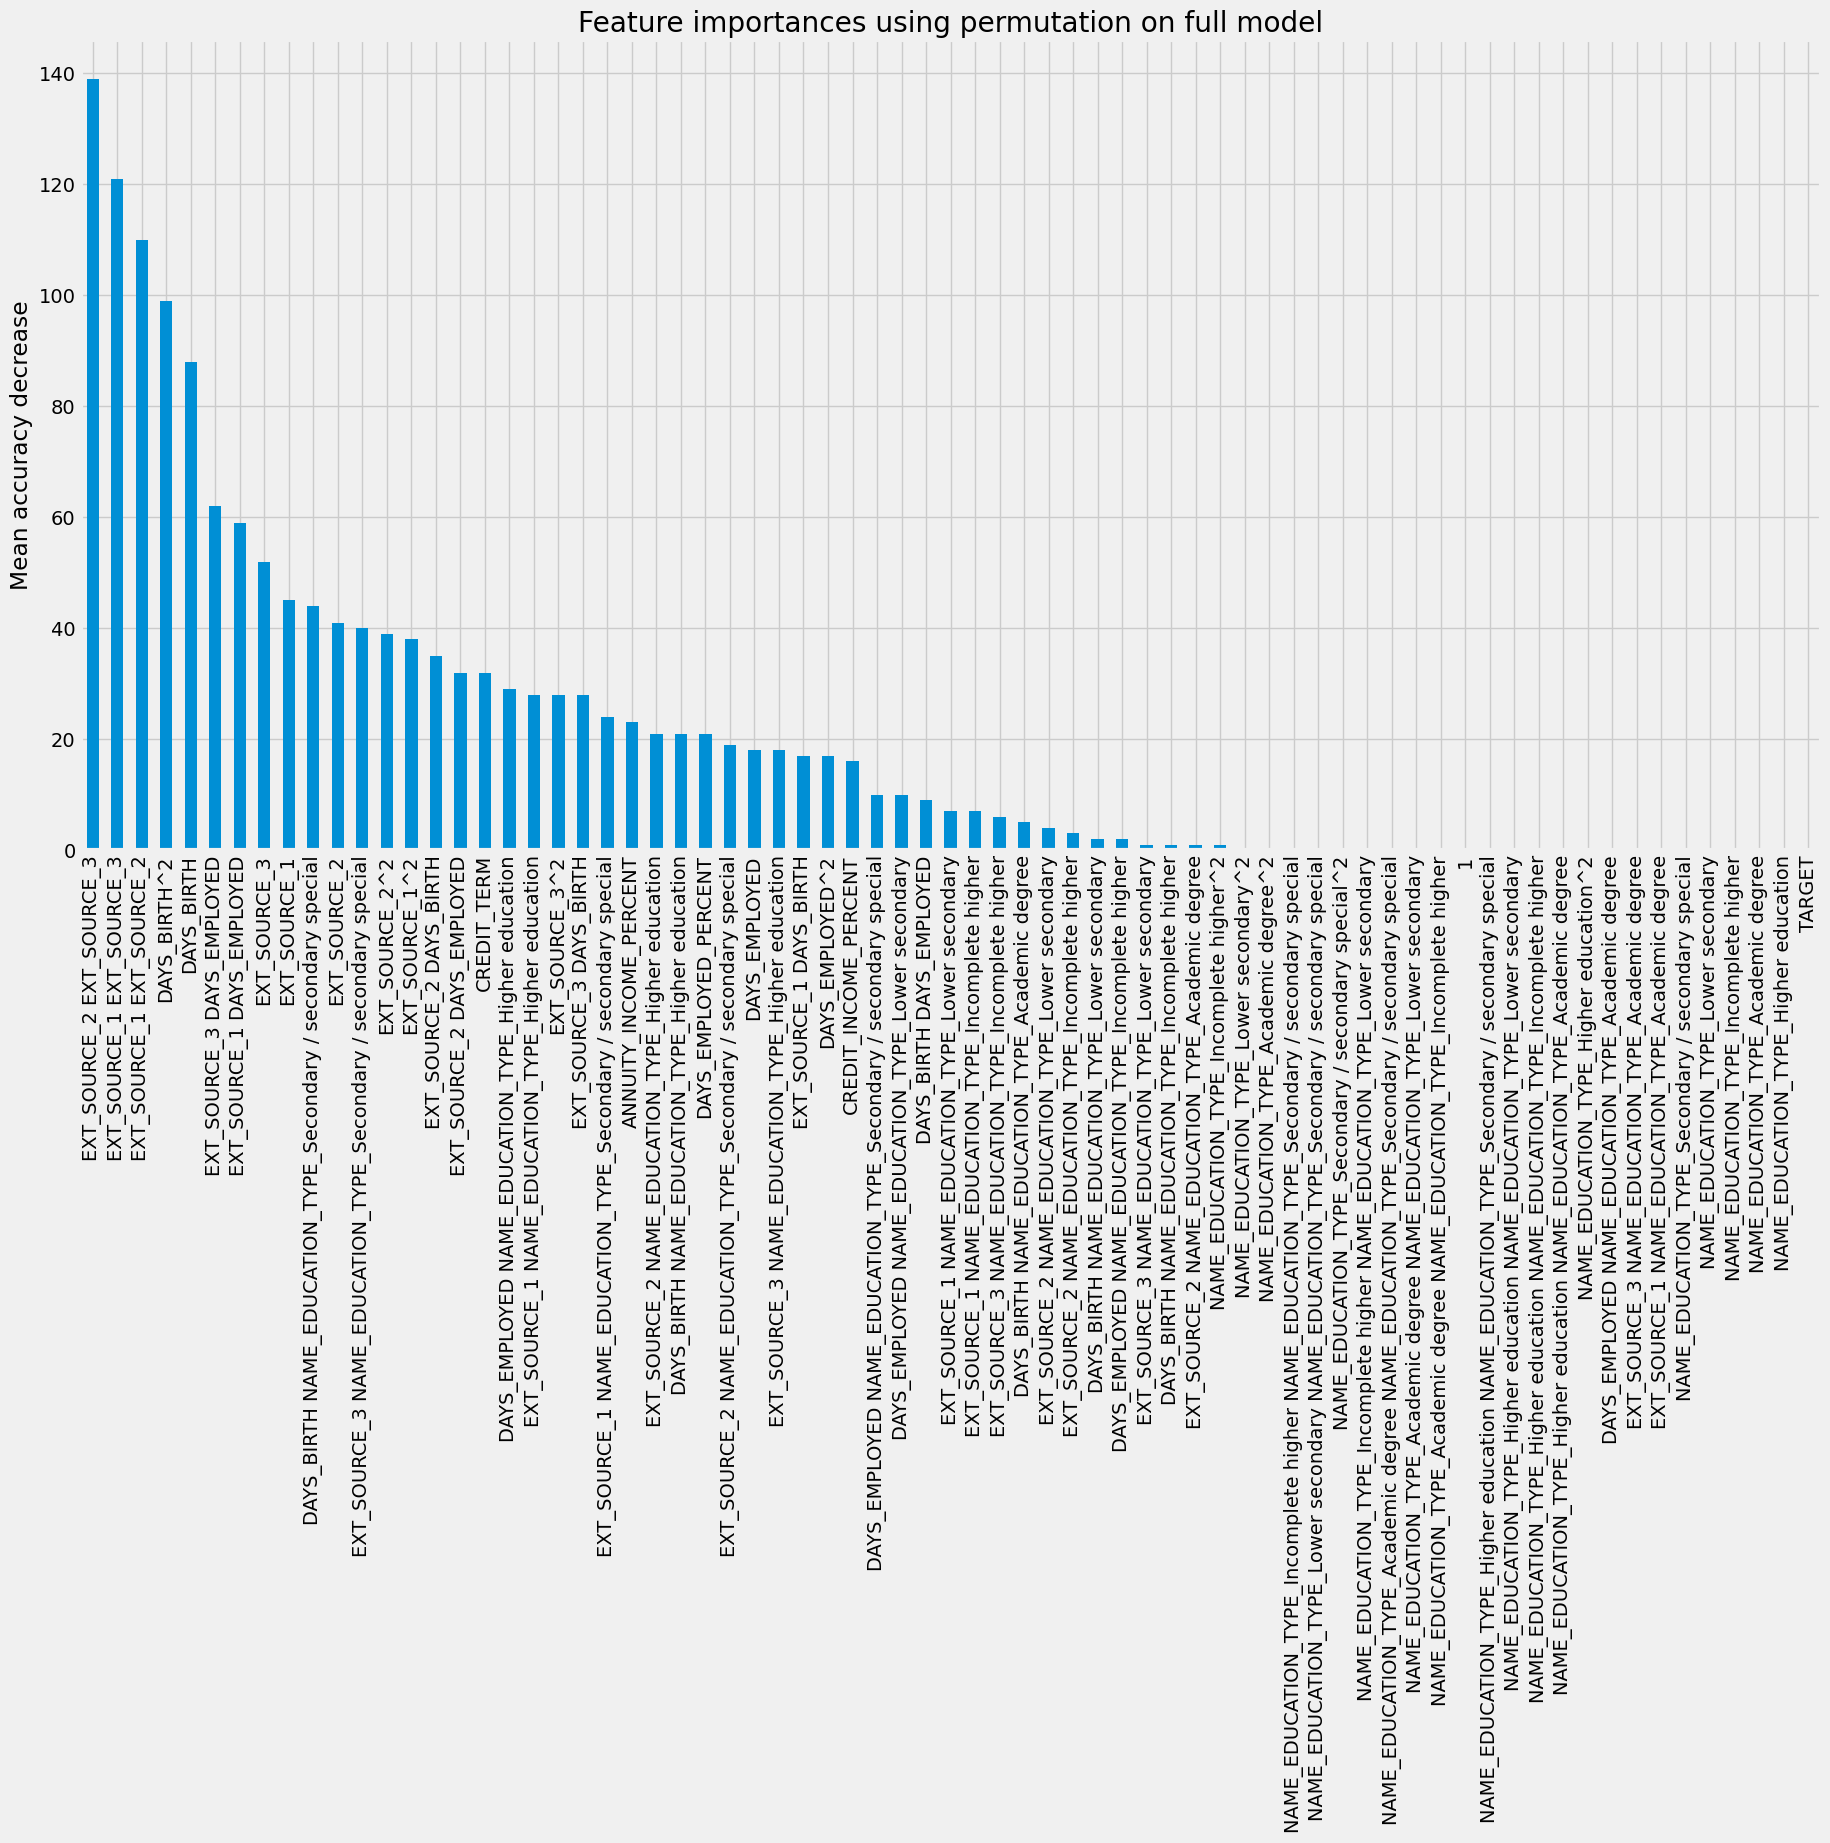

In [66]:
plt.figure(figsize = (20, 10))
lgbm_importances_sorted.plot.bar(result1.importances_std)
plt.title("Feature importances using permutation on full model")
plt.ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [67]:
label1 = app_train['TARGET']
train1 = a   [['TARGET',
               'EXT_SOURCE_2 EXT_SOURCE_3',
               'EXT_SOURCE_1 EXT_SOURCE_3',
               'EXT_SOURCE_1 EXT_SOURCE_2',
               'DAYS_BIRTH^2',
               'DAYS_BIRTH',
               'EXT_SOURCE_3 DAYS_EMPLOYED',
               'EXT_SOURCE_1 DAYS_EMPLOYED',
               'EXT_SOURCE_3',
               'EXT_SOURCE_1',
               'DAYS_BIRTH NAME_EDUCATION_TYPE_Secondary / secondary special',
               'EXT_SOURCE_2',
               'EXT_SOURCE_3 NAME_EDUCATION_TYPE_Secondary / secondary special',
               'EXT_SOURCE_2^2',
               'EXT_SOURCE_1^2',
               'EXT_SOURCE_2 DAYS_BIRTH',
               'EXT_SOURCE_2 DAYS_EMPLOYED',
               'CREDIT_TERM',
               'DAYS_EMPLOYED NAME_EDUCATION_TYPE_Higher education',
               'EXT_SOURCE_1 NAME_EDUCATION_TYPE_Higher education',
               'EXT_SOURCE_3^2',
               'EXT_SOURCE_3 DAYS_BIRTH',
               'EXT_SOURCE_1 NAME_EDUCATION_TYPE_Secondary / secondary special',
               'ANNUITY_INCOME_PERCENT',
               'EXT_SOURCE_2 NAME_EDUCATION_TYPE_Higher education',
              ]]

train,test,y_train,y_test= train_test_split(train1,label1,test_size = 0.2,random_state = 0)
features = list(train.columns)

# imputer = SimpleImputer(strategy='median')
imputer = IterativeImputer(max_iter=10, random_state=0)
std = StandardScaler()
 
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

std.fit(train)
train = std.transform(train)
test = std.transform(test)

In [68]:
model = lgb.LGBMClassifier(is_unbalance = True,objective = 'binary', max_depth = 4, num_leaves = 20, min_child_samples = 19, min_child_weight = 0.001,
bagging_fraction = 1, feature_fraction = 0.6,  bagging_freq = 2, cat_smooth = 0,reg_lambda = 0.03,
reg_alpha = 0.01, metric = 'binary_logloss,auc',learning_rate = 0.05,num_iterations = 100)


light_gbm = model.fit(train, y_train, eval_metric = 'auc',
          eval_set = [(test, y_test), (train, y_train)],
          eval_names = ['test', 'train'],
          early_stopping_rounds = 100, verbose = 100)

print(np.mean(cross_val_score(model, train, y_train, cv=10)))
y_pred = model.predict(test)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Training until validation scores don't improve for 100 rounds
[100]	train's auc: 0.744982	train's binary_logloss: 0.592404	test's auc: 0.729907	test's binary_logloss: 0.593057
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.744982	train's binary_logloss: 0.592404	test's auc: 0.729907	test's binary_logloss: 0.593057
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Cu

[[ 3191  1702]
 [17801 38609]]


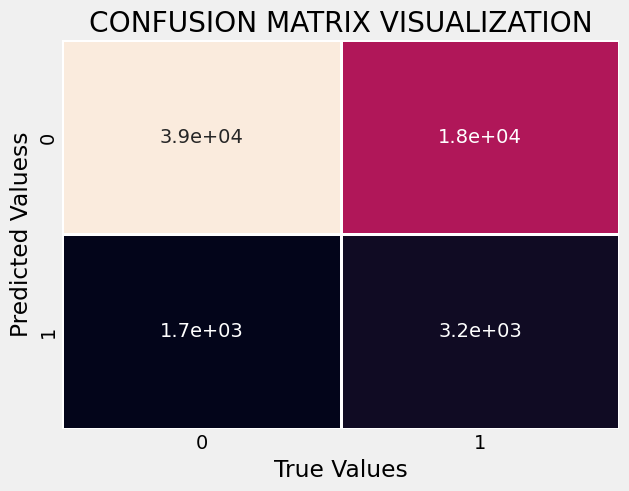

LightGBM:
 accuracy = 68.18589628566302


In [69]:
print(confusion_matrix(y_test, y_pred,labels=[1,0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("Predicted Valuess")
plt.xlabel("True Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()
print('LightGBM:\n', 'accuracy =',accuracy_score(y_test, y_pred)*100)

In [70]:
# Performance Evaluation
# Accuracy 


# AUC

predictions = model.predict_proba(test)[:,1]
test_auc = roc_auc_score(y_test,predictions)

# score-report


# kappa-score


print('LightGBM:\n', 'accuracy =',accuracy_score(y_test, y_pred)*100,'\n',
      'AUC =' ,test_auc,'\n', 'kappa-score =',cohen_kappa_score(y_test,y_pred),
      'scores table =','\n',classification_report(y_test,y_pred),'\n') 

LightGBM:
 accuracy = 68.18589628566302 
 AUC = 0.7299070938868238 
 kappa-score = 0.1345070033396537 scores table = 
               precision    recall  f1-score   support

           0       0.96      0.68      0.80     56410
           1       0.15      0.65      0.25      4893

    accuracy                           0.68     61303
   macro avg       0.55      0.67      0.52     61303
weighted avg       0.89      0.68      0.75     61303
 

